## Data Generation

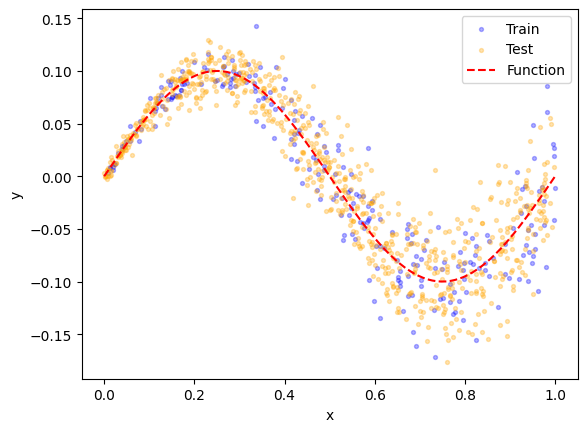

In [7]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler  

def process_data(X, y, train_size, random_state=None):
    """ 
    Splits data into training, calibration, and test sets, and normalizes the inputs

    Parameters:
    ------------
    X: array 
        The inputs of the dataset to be split 
    y: array 
        The outputs of the dataset to be split
    train_size: float
        fraction of the dataset to use for training (bounded between 0 and 1)
    calibrate_size: float 
        fraction of the dataset to use for calibration (bounded between 0 and 1)
    random_state: float 
        The split state to fix for consistent results between function calls (defaults to None)
    """
    
    # Split into train/calibration and validation sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-(train_size), random_state=random_state)

    return X_train, X_test, y_train, y_test

def recombine_data(X_calibrate, X_test, y_calibrate, y_test):
    """
    Combines and then splits calibration and testing data for conformal prediction validation  

    Parameters:
    ----------
    X_calibrate: array 
        The inputs of the calibration dataset 
    X_test: array 
        The inputs of the test dataset 
    y_calibrate: array 
        The outputs of the calibration dataset 
    y_test: array 
        The outputs of the test dataset 
    """
    test_size = y_test.size / (y_test.size + y_calibrate.size)
    combined_X = np.append(X_calibrate, X_test, axis=0)
    combined_y = np.append(y_calibrate, y_test)
    new_X_calibrate, new_X_test, new_y_calibrate, new_y_test = train_test_split(combined_X, combined_y, test_size=test_size)
    return new_X_calibrate, new_X_test, new_y_calibrate, new_y_test 

def generate_unvaried_data(n):
    """ 
    Generates synthetic data with no variance according to the sine function described above 

    Parameters: 
    -----------
    n: int 
        amount of data to generate 
    """
    x = np.linspace(0, 1, n)
    y = 0.1 * np.sin(2 * np.pi * x)
    return(x.reshape(-1, 1), y)

def generate_varied_data(n):
    """ 
    Generates synthetic data with variance according to the sine function described above

    Parameters: 
    -----------
    n: int 
        amount of data to generate 
    """
    rng = np.random.default_rng() 
    x = rng.random(n)
    epsilon = rng.standard_normal(n)
    y = 0.1 * (np.sin(2 * np.pi * x) + 0.4*epsilon * (0.1 + x)) 
    return x.reshape(-1, 1), y 

def plot_data(X, y, ax, scatter = False, **kwargs):
    """ 
    A generic plotting function 

    Parameters: 
    ----------- 
    X: np.array
        The inputs to be plotted 
    y: np.array 
        The outputs to be plotted 
    ax: Axes 
        The axes on which to plot the data 
    scatter: bool 
        True if a scatter plot is desired, false if a line graph is desired 
    **kwargs 
        matplotlib additional plotting parameters 
    """
    if scatter == True: 
        ax.scatter(X, y, **kwargs)
    else: 
        ax.plot(X, y, **kwargs)
    ax.set_xlabel("x")
    ax.set_ylabel("y")

fig, ax = plt.subplots() 
fun_x, fun_y = generate_unvaried_data(100)
x,y = generate_varied_data(1000)
X_train, X_test, y_train, y_test = process_data(x, y, 0.25)
plot_data(X_train, y_train, ax, scatter=True, color='blue', alpha = 0.3, label="Train", s=8)
plot_data(X_test, y_test, ax, scatter=True, color='orange', alpha = 0.3, label="Test", s=8)
plot_data(fun_x, fun_y, ax, color='red', linestyle = 'dashed', label='Function')
plt.legend()
plt.show()


[Logger-12256] epoch=0, train_loss=0.33394166827201843


[Logger-12256] epoch=5, train_loss=0.22572878003120422
[Logger-12256] epoch=10, train_loss=0.1418345868587494
[Logger-12256] epoch=15, train_loss=0.08290089666843414
[Logger-12256] epoch=20, train_loss=0.05647741258144379
[Logger-12256] epoch=25, train_loss=0.05324038118124008
[Logger-12256] epoch=30, train_loss=0.053915835916996
[Logger-12256] epoch=35, train_loss=0.05143670737743378
[Logger-12256] epoch=40, train_loss=0.04711431264877319
[Logger-12256] epoch=45, train_loss=0.043042268604040146
[Logger-12256] epoch=50, train_loss=0.04160427302122116
[Logger-12256] epoch=55, train_loss=0.04088420420885086
[Logger-12256] epoch=60, train_loss=0.03980352729558945
[Logger-12256] epoch=65, train_loss=0.03921408951282501
[Logger-12256] epoch=70, train_loss=0.03847067058086395
[Logger-12256] epoch=75, train_loss=0.037756484001874924
[Logger-12256] epoch=80, train_loss=0.03716643154621124
[Logger-12256] epoch=85, train_loss=0.03648632764816284
[Logger-12256] epoch=90, train_loss=0.035776067525

0
coverage: 0.876


[Logger-12256] epoch=30, train_loss=0.06011021509766579
[Logger-12256] epoch=35, train_loss=0.058747973293066025
[Logger-12256] epoch=40, train_loss=0.05487891286611557
[Logger-12256] epoch=45, train_loss=0.049597304314374924
[Logger-12256] epoch=50, train_loss=0.044612713158130646
[Logger-12256] epoch=55, train_loss=0.04365474358201027
[Logger-12256] epoch=60, train_loss=0.041931163519620895
[Logger-12256] epoch=65, train_loss=0.040652524679899216
[Logger-12256] epoch=70, train_loss=0.04011562466621399
[Logger-12256] epoch=75, train_loss=0.03959884122014046
[Logger-12256] epoch=80, train_loss=0.03891214355826378
[Logger-12256] epoch=85, train_loss=0.03848185017704964
[Logger-12256] epoch=90, train_loss=0.03796885162591934
[Logger-12256] epoch=95, train_loss=0.03745894506573677
[Logger-12256] epoch=0, train_loss=0.46700233221054077
[Logger-12256] epoch=5, train_loss=0.3514181077480316
[Logger-12256] epoch=10, train_loss=0.26130008697509766
[Logger-12256] epoch=15, train_loss=0.18561401

1
coverage: 0.88


[Logger-12256] epoch=30, train_loss=0.05519172549247742
[Logger-12256] epoch=35, train_loss=0.053641900420188904
[Logger-12256] epoch=40, train_loss=0.054801225662231445
[Logger-12256] epoch=45, train_loss=0.05332517623901367
[Logger-12256] epoch=50, train_loss=0.05025111138820648
[Logger-12256] epoch=55, train_loss=0.047820087522268295
[Logger-12256] epoch=60, train_loss=0.046231627464294434
[Logger-12256] epoch=65, train_loss=0.043885041028261185
[Logger-12256] epoch=70, train_loss=0.04292769730091095
[Logger-12256] epoch=75, train_loss=0.042452793568372726
[Logger-12256] epoch=80, train_loss=0.04187535494565964
[Logger-12256] epoch=85, train_loss=0.04126426950097084
[Logger-12256] epoch=90, train_loss=0.04091954231262207
[Logger-12256] epoch=95, train_loss=0.04049545153975487
[Logger-12256] epoch=0, train_loss=0.4052925705909729
[Logger-12256] epoch=5, train_loss=0.2866857051849365
[Logger-12256] epoch=10, train_loss=0.18938535451889038
[Logger-12256] epoch=15, train_loss=0.11752051

2
coverage: 0.902


[Logger-12256] epoch=30, train_loss=0.051876332610845566
[Logger-12256] epoch=35, train_loss=0.051751069724559784
[Logger-12256] epoch=40, train_loss=0.049531497061252594
[Logger-12256] epoch=45, train_loss=0.04848005622625351
[Logger-12256] epoch=50, train_loss=0.046381451189517975
[Logger-12256] epoch=55, train_loss=0.04348361864686012
[Logger-12256] epoch=60, train_loss=0.04136310890316963
[Logger-12256] epoch=65, train_loss=0.04097980633378029
[Logger-12256] epoch=70, train_loss=0.039436791092157364
[Logger-12256] epoch=75, train_loss=0.03898883983492851
[Logger-12256] epoch=80, train_loss=0.03796379640698433
[Logger-12256] epoch=85, train_loss=0.03735342249274254
[Logger-12256] epoch=90, train_loss=0.03661832585930824
[Logger-12256] epoch=95, train_loss=0.03578880801796913
[Logger-12256] epoch=0, train_loss=0.4230755865573883
[Logger-12256] epoch=5, train_loss=0.30719175934791565
[Logger-12256] epoch=10, train_loss=0.21513721346855164
[Logger-12256] epoch=15, train_loss=0.14054311

3
coverage: 0.894


[Logger-12256] epoch=30, train_loss=0.05081334710121155
[Logger-12256] epoch=35, train_loss=0.051839105784893036
[Logger-12256] epoch=40, train_loss=0.05098915845155716
[Logger-12256] epoch=45, train_loss=0.04848653823137283
[Logger-12256] epoch=50, train_loss=0.045025259256362915
[Logger-12256] epoch=55, train_loss=0.04282280057668686
[Logger-12256] epoch=60, train_loss=0.04144277423620224
[Logger-12256] epoch=65, train_loss=0.04080062359571457
[Logger-12256] epoch=70, train_loss=0.03960222005844116
[Logger-12256] epoch=75, train_loss=0.03882706165313721
[Logger-12256] epoch=80, train_loss=0.03836583346128464
[Logger-12256] epoch=85, train_loss=0.03776262700557709
[Logger-12256] epoch=90, train_loss=0.03721357882022858
[Logger-12256] epoch=95, train_loss=0.03664689138531685
[Logger-12256] epoch=0, train_loss=0.4417931139469147
[Logger-12256] epoch=5, train_loss=0.303796648979187
[Logger-12256] epoch=10, train_loss=0.19901160895824432
[Logger-12256] epoch=15, train_loss=0.1237062215805

4
coverage: 0.904


[Logger-12256] epoch=30, train_loss=0.05612083524465561
[Logger-12256] epoch=35, train_loss=0.05654577165842056
[Logger-12256] epoch=40, train_loss=0.05396697670221329
[Logger-12256] epoch=45, train_loss=0.050640299916267395
[Logger-12256] epoch=50, train_loss=0.04762575030326843
[Logger-12256] epoch=55, train_loss=0.04510403051972389
[Logger-12256] epoch=60, train_loss=0.04377949610352516
[Logger-12256] epoch=65, train_loss=0.04341172054409981
[Logger-12256] epoch=70, train_loss=0.042795006185770035
[Logger-12256] epoch=75, train_loss=0.04199659079313278
[Logger-12256] epoch=80, train_loss=0.04145028814673424
[Logger-12256] epoch=85, train_loss=0.04108443483710289
[Logger-12256] epoch=90, train_loss=0.040640801191329956
[Logger-12256] epoch=95, train_loss=0.04010618105530739
[Logger-12256] epoch=0, train_loss=0.4707830548286438
[Logger-12256] epoch=5, train_loss=0.33859071135520935
[Logger-12256] epoch=10, train_loss=0.23705217242240906
[Logger-12256] epoch=15, train_loss=0.1601009666

5
coverage: 0.904


[Logger-12256] epoch=30, train_loss=0.051301829516887665
[Logger-12256] epoch=35, train_loss=0.05434068664908409
[Logger-12256] epoch=40, train_loss=0.05451461672782898
[Logger-12256] epoch=45, train_loss=0.05276027321815491
[Logger-12256] epoch=50, train_loss=0.04976188391447067
[Logger-12256] epoch=55, train_loss=0.04591844975948334
[Logger-12256] epoch=60, train_loss=0.04321767017245293
[Logger-12256] epoch=65, train_loss=0.041957102715969086
[Logger-12256] epoch=70, train_loss=0.040057871490716934
[Logger-12256] epoch=75, train_loss=0.03917588293552399
[Logger-12256] epoch=80, train_loss=0.038503386080265045
[Logger-12256] epoch=85, train_loss=0.03816106542944908
[Logger-12256] epoch=90, train_loss=0.037584833800792694
[Logger-12256] epoch=95, train_loss=0.03713864088058472
[Logger-12256] epoch=0, train_loss=0.4430817663669586
[Logger-12256] epoch=5, train_loss=0.30982181429862976
[Logger-12256] epoch=10, train_loss=0.20239517092704773
[Logger-12256] epoch=15, train_loss=0.12124054

6
coverage: 0.906


[Logger-12256] epoch=30, train_loss=0.05916263908147812
[Logger-12256] epoch=35, train_loss=0.05868164822459221
[Logger-12256] epoch=40, train_loss=0.05562475696206093
[Logger-12256] epoch=45, train_loss=0.05251235514879227
[Logger-12256] epoch=50, train_loss=0.04876844212412834
[Logger-12256] epoch=55, train_loss=0.04412331432104111
[Logger-12256] epoch=60, train_loss=0.043410226702690125
[Logger-12256] epoch=65, train_loss=0.041983697563409805
[Logger-12256] epoch=70, train_loss=0.04175342619419098
[Logger-12256] epoch=75, train_loss=0.04105975478887558
[Logger-12256] epoch=80, train_loss=0.04044853150844574
[Logger-12256] epoch=85, train_loss=0.03995152562856674
[Logger-12256] epoch=90, train_loss=0.039470821619033813
[Logger-12256] epoch=95, train_loss=0.03901049867272377
[Logger-12256] epoch=0, train_loss=0.4578493535518646
[Logger-12256] epoch=5, train_loss=0.34747323393821716
[Logger-12256] epoch=10, train_loss=0.25813373923301697
[Logger-12256] epoch=15, train_loss=0.1835732460

7
coverage: 0.93


[Logger-12256] epoch=30, train_loss=0.06365722417831421
[Logger-12256] epoch=35, train_loss=0.05328615754842758
[Logger-12256] epoch=40, train_loss=0.051623910665512085
[Logger-12256] epoch=45, train_loss=0.05021991953253746
[Logger-12256] epoch=50, train_loss=0.047905851155519485
[Logger-12256] epoch=55, train_loss=0.04544365033507347
[Logger-12256] epoch=60, train_loss=0.04421808943152428
[Logger-12256] epoch=65, train_loss=0.04200667887926102
[Logger-12256] epoch=70, train_loss=0.04138593748211861
[Logger-12256] epoch=75, train_loss=0.04033143073320389
[Logger-12256] epoch=80, train_loss=0.0396508127450943
[Logger-12256] epoch=85, train_loss=0.038971398025751114
[Logger-12256] epoch=90, train_loss=0.038336992263793945
[Logger-12256] epoch=95, train_loss=0.037706419825553894
[Logger-12256] epoch=0, train_loss=0.4035841226577759
[Logger-12256] epoch=5, train_loss=0.26731520891189575
[Logger-12256] epoch=10, train_loss=0.1639419049024582
[Logger-12256] epoch=15, train_loss=0.0901633650

8
coverage: 0.888


[Logger-12256] epoch=30, train_loss=0.05798063054680824
[Logger-12256] epoch=35, train_loss=0.055262621492147446
[Logger-12256] epoch=40, train_loss=0.05156954750418663
[Logger-12256] epoch=45, train_loss=0.047640610486269
[Logger-12256] epoch=50, train_loss=0.04278697445988655
[Logger-12256] epoch=55, train_loss=0.04270198941230774
[Logger-12256] epoch=60, train_loss=0.04155401885509491
[Logger-12256] epoch=65, train_loss=0.04070286080241203
[Logger-12256] epoch=70, train_loss=0.03978952392935753
[Logger-12256] epoch=75, train_loss=0.039327580481767654
[Logger-12256] epoch=80, train_loss=0.038759201765060425
[Logger-12256] epoch=85, train_loss=0.038179848343133926
[Logger-12256] epoch=90, train_loss=0.03759804740548134
[Logger-12256] epoch=95, train_loss=0.037074580788612366
[Logger-12256] epoch=0, train_loss=0.4184277057647705
[Logger-12256] epoch=5, train_loss=0.3137521743774414
[Logger-12256] epoch=10, train_loss=0.23106852173805237
[Logger-12256] epoch=15, train_loss=0.16348874568

9
coverage: 0.898


[Logger-12256] epoch=35, train_loss=0.049323052167892456
[Logger-12256] epoch=40, train_loss=0.0496334470808506
[Logger-12256] epoch=45, train_loss=0.04874970391392708
[Logger-12256] epoch=50, train_loss=0.04636212810873985
[Logger-12256] epoch=55, train_loss=0.04536985978484154
[Logger-12256] epoch=60, train_loss=0.04374296963214874
[Logger-12256] epoch=65, train_loss=0.04244004935026169
[Logger-12256] epoch=70, train_loss=0.04070959985256195
[Logger-12256] epoch=75, train_loss=0.040438782423734665
[Logger-12256] epoch=80, train_loss=0.039544522762298584
[Logger-12256] epoch=85, train_loss=0.03901215270161629
[Logger-12256] epoch=90, train_loss=0.03833196684718132
[Logger-12256] epoch=95, train_loss=0.037848878651857376
[Logger-12256] epoch=0, train_loss=0.5110581517219543
[Logger-12256] epoch=5, train_loss=0.3525412678718567
[Logger-12256] epoch=10, train_loss=0.22809891402721405
[Logger-12256] epoch=15, train_loss=0.1348511427640915
[Logger-12256] epoch=20, train_loss=0.071495056152

10
coverage: 0.924


[Logger-12256] epoch=25, train_loss=0.05893419310450554
[Logger-12256] epoch=30, train_loss=0.06342131644487381
[Logger-12256] epoch=35, train_loss=0.06308244168758392
[Logger-12256] epoch=40, train_loss=0.059755176305770874
[Logger-12256] epoch=45, train_loss=0.054685428738594055
[Logger-12256] epoch=50, train_loss=0.04870741814374924
[Logger-12256] epoch=55, train_loss=0.04437125474214554
[Logger-12256] epoch=60, train_loss=0.042276423424482346
[Logger-12256] epoch=65, train_loss=0.04214318469166756
[Logger-12256] epoch=70, train_loss=0.04107102006673813
[Logger-12256] epoch=75, train_loss=0.040450699627399445
[Logger-12256] epoch=80, train_loss=0.039956338703632355
[Logger-12256] epoch=85, train_loss=0.03952188417315483
[Logger-12256] epoch=90, train_loss=0.038942255079746246
[Logger-12256] epoch=95, train_loss=0.038529518991708755
[Logger-12256] epoch=0, train_loss=0.4805208742618561
[Logger-12256] epoch=5, train_loss=0.3595598340034485
[Logger-12256] epoch=10, train_loss=0.2674479

11
coverage: 0.83


[Logger-12256] epoch=30, train_loss=0.0672072172164917
[Logger-12256] epoch=35, train_loss=0.05451824516057968
[Logger-12256] epoch=40, train_loss=0.05179238319396973
[Logger-12256] epoch=45, train_loss=0.05160314217209816
[Logger-12256] epoch=50, train_loss=0.049237899482250214
[Logger-12256] epoch=55, train_loss=0.04582656919956207
[Logger-12256] epoch=60, train_loss=0.043793290853500366
[Logger-12256] epoch=65, train_loss=0.04135841503739357
[Logger-12256] epoch=70, train_loss=0.041513651609420776
[Logger-12256] epoch=75, train_loss=0.04064660146832466
[Logger-12256] epoch=80, train_loss=0.039776988327503204
[Logger-12256] epoch=85, train_loss=0.03925645351409912
[Logger-12256] epoch=90, train_loss=0.03882026672363281
[Logger-12256] epoch=95, train_loss=0.03841616213321686
[Logger-12256] epoch=0, train_loss=0.3978217542171478
[Logger-12256] epoch=5, train_loss=0.2832140028476715
[Logger-12256] epoch=10, train_loss=0.19167038798332214
[Logger-12256] epoch=15, train_loss=0.12243583053

12
coverage: 0.904


[Logger-12256] epoch=35, train_loss=0.04725082218647003
[Logger-12256] epoch=40, train_loss=0.0464194156229496
[Logger-12256] epoch=45, train_loss=0.04511246085166931
[Logger-12256] epoch=50, train_loss=0.043711498379707336
[Logger-12256] epoch=55, train_loss=0.04209993779659271
[Logger-12256] epoch=60, train_loss=0.04046166315674782
[Logger-12256] epoch=65, train_loss=0.039197083562612534
[Logger-12256] epoch=70, train_loss=0.03912224620580673
[Logger-12256] epoch=75, train_loss=0.03818916901946068
[Logger-12256] epoch=80, train_loss=0.03767184540629387
[Logger-12256] epoch=85, train_loss=0.03703077509999275
[Logger-12256] epoch=90, train_loss=0.03646078705787659
[Logger-12256] epoch=95, train_loss=0.035879578441381454
[Logger-12256] epoch=0, train_loss=0.40841981768608093
[Logger-12256] epoch=5, train_loss=0.28849929571151733
[Logger-12256] epoch=10, train_loss=0.19423699378967285
[Logger-12256] epoch=15, train_loss=0.1193569004535675
[Logger-12256] epoch=20, train_loss=0.06706659495

13
coverage: 0.91


[Logger-12256] epoch=30, train_loss=0.04993565380573273
[Logger-12256] epoch=35, train_loss=0.05013219267129898
[Logger-12256] epoch=40, train_loss=0.04923992231488228
[Logger-12256] epoch=45, train_loss=0.04840020835399628
[Logger-12256] epoch=50, train_loss=0.0464676171541214
[Logger-12256] epoch=55, train_loss=0.04388323426246643
[Logger-12256] epoch=60, train_loss=0.042579539120197296
[Logger-12256] epoch=65, train_loss=0.04081381857395172
[Logger-12256] epoch=70, train_loss=0.03925364091992378
[Logger-12256] epoch=75, train_loss=0.03921360522508621
[Logger-12256] epoch=80, train_loss=0.03823848068714142
[Logger-12256] epoch=85, train_loss=0.03777641803026199
[Logger-12256] epoch=90, train_loss=0.036938317120075226
[Logger-12256] epoch=95, train_loss=0.036304835230112076
[Logger-12256] epoch=0, train_loss=0.505885899066925
[Logger-12256] epoch=5, train_loss=0.39254263043403625
[Logger-12256] epoch=10, train_loss=0.2975737154483795
[Logger-12256] epoch=15, train_loss=0.2146745026111

14
coverage: 0.868


[Logger-12256] epoch=35, train_loss=0.04756186529994011
[Logger-12256] epoch=40, train_loss=0.04877442494034767
[Logger-12256] epoch=45, train_loss=0.04828802868723869
[Logger-12256] epoch=50, train_loss=0.04757646471261978
[Logger-12256] epoch=55, train_loss=0.04558748006820679
[Logger-12256] epoch=60, train_loss=0.04315613582730293
[Logger-12256] epoch=65, train_loss=0.04075997322797775
[Logger-12256] epoch=70, train_loss=0.04010395333170891
[Logger-12256] epoch=75, train_loss=0.03909994661808014
[Logger-12256] epoch=80, train_loss=0.03870677947998047
[Logger-12256] epoch=85, train_loss=0.03768144175410271
[Logger-12256] epoch=90, train_loss=0.03721576929092407
[Logger-12256] epoch=95, train_loss=0.036575399339199066
[Logger-12256] epoch=0, train_loss=0.42545247077941895
[Logger-12256] epoch=5, train_loss=0.29943040013313293
[Logger-12256] epoch=10, train_loss=0.2021927535533905
[Logger-12256] epoch=15, train_loss=0.1255113184452057
[Logger-12256] epoch=20, train_loss=0.0704349279403

15
coverage: 0.876


[Logger-12256] epoch=30, train_loss=0.052767977118492126
[Logger-12256] epoch=35, train_loss=0.05301469936966896
[Logger-12256] epoch=40, train_loss=0.05130397155880928
[Logger-12256] epoch=45, train_loss=0.04895634576678276
[Logger-12256] epoch=50, train_loss=0.04610363394021988
[Logger-12256] epoch=55, train_loss=0.04375648871064186
[Logger-12256] epoch=60, train_loss=0.041762884706258774
[Logger-12256] epoch=65, train_loss=0.040416788309812546
[Logger-12256] epoch=70, train_loss=0.04013833776116371
[Logger-12256] epoch=75, train_loss=0.039136216044425964
[Logger-12256] epoch=80, train_loss=0.038897909224033356
[Logger-12256] epoch=85, train_loss=0.03802688792347908
[Logger-12256] epoch=90, train_loss=0.03762972727417946
[Logger-12256] epoch=95, train_loss=0.037025172263383865
[Logger-12256] epoch=0, train_loss=0.38566407561302185
[Logger-12256] epoch=5, train_loss=0.2629270851612091
[Logger-12256] epoch=10, train_loss=0.16759547591209412
[Logger-12256] epoch=15, train_loss=0.0968939

16
coverage: 0.882


[Logger-12256] epoch=30, train_loss=0.06456511467695236
[Logger-12256] epoch=35, train_loss=0.06265425682067871
[Logger-12256] epoch=40, train_loss=0.05855628475546837
[Logger-12256] epoch=45, train_loss=0.05299445241689682
[Logger-12256] epoch=50, train_loss=0.04629424214363098
[Logger-12256] epoch=55, train_loss=0.04516388848423958
[Logger-12256] epoch=60, train_loss=0.04270930588245392
[Logger-12256] epoch=65, train_loss=0.041767384856939316
[Logger-12256] epoch=70, train_loss=0.041089776903390884
[Logger-12256] epoch=75, train_loss=0.04005603864789009
[Logger-12256] epoch=80, train_loss=0.03983568027615547
[Logger-12256] epoch=85, train_loss=0.03919080272316933
[Logger-12256] epoch=90, train_loss=0.038721468299627304
[Logger-12256] epoch=95, train_loss=0.038249216973781586
[Logger-12256] epoch=0, train_loss=0.40864142775535583
[Logger-12256] epoch=5, train_loss=0.28915759921073914
[Logger-12256] epoch=10, train_loss=0.18958646059036255
[Logger-12256] epoch=15, train_loss=0.11169217

17
coverage: 0.938


[Logger-12256] epoch=30, train_loss=0.056303203105926514
[Logger-12256] epoch=35, train_loss=0.055029574781656265
[Logger-12256] epoch=40, train_loss=0.051758114248514175
[Logger-12256] epoch=45, train_loss=0.04822610691189766
[Logger-12256] epoch=50, train_loss=0.045483317226171494
[Logger-12256] epoch=55, train_loss=0.043346453458070755
[Logger-12256] epoch=60, train_loss=0.04313034936785698
[Logger-12256] epoch=65, train_loss=0.04130527749657631
[Logger-12256] epoch=70, train_loss=0.04102477431297302
[Logger-12256] epoch=75, train_loss=0.04018363356590271
[Logger-12256] epoch=80, train_loss=0.0395657941699028
[Logger-12256] epoch=85, train_loss=0.03894928842782974
[Logger-12256] epoch=90, train_loss=0.038342591375112534
[Logger-12256] epoch=95, train_loss=0.037670474499464035
[Logger-12256] epoch=0, train_loss=0.3796504735946655
[Logger-12256] epoch=5, train_loss=0.25233885645866394
[Logger-12256] epoch=10, train_loss=0.15911805629730225
[Logger-12256] epoch=15, train_loss=0.0931662

18
coverage: 0.914


[Logger-12256] epoch=30, train_loss=0.055930159986019135
[Logger-12256] epoch=35, train_loss=0.05353245511651039
[Logger-12256] epoch=40, train_loss=0.04888696223497391
[Logger-12256] epoch=45, train_loss=0.04509972780942917
[Logger-12256] epoch=50, train_loss=0.042675238102674484
[Logger-12256] epoch=55, train_loss=0.04134593531489372
[Logger-12256] epoch=60, train_loss=0.04065074026584625
[Logger-12256] epoch=65, train_loss=0.03992433473467827
[Logger-12256] epoch=70, train_loss=0.03920048102736473
[Logger-12256] epoch=75, train_loss=0.03865467384457588
[Logger-12256] epoch=80, train_loss=0.03801831975579262
[Logger-12256] epoch=85, train_loss=0.03740604594349861
[Logger-12256] epoch=90, train_loss=0.036793291568756104
[Logger-12256] epoch=95, train_loss=0.03613382205367088
[Logger-12256] epoch=0, train_loss=0.4305196702480316
[Logger-12256] epoch=5, train_loss=0.2874975800514221
[Logger-12256] epoch=10, train_loss=0.17315086722373962
[Logger-12256] epoch=15, train_loss=0.08857454359

19
coverage: 0.91


[Logger-12256] epoch=30, train_loss=0.05426793918013573
[Logger-12256] epoch=35, train_loss=0.05159677565097809
[Logger-12256] epoch=40, train_loss=0.049672629684209824
[Logger-12256] epoch=45, train_loss=0.04749782010912895
[Logger-12256] epoch=50, train_loss=0.043970126658678055
[Logger-12256] epoch=55, train_loss=0.040567345917224884
[Logger-12256] epoch=60, train_loss=0.0399918369948864
[Logger-12256] epoch=65, train_loss=0.03942794352769852
[Logger-12256] epoch=70, train_loss=0.03850001096725464
[Logger-12256] epoch=75, train_loss=0.03796840459108353
[Logger-12256] epoch=80, train_loss=0.03732091560959816
[Logger-12256] epoch=85, train_loss=0.036733392626047134
[Logger-12256] epoch=90, train_loss=0.036121949553489685
[Logger-12256] epoch=95, train_loss=0.035527780652046204
[Logger-12256] epoch=0, train_loss=0.4947355091571808
[Logger-12256] epoch=5, train_loss=0.35328203439712524
[Logger-12256] epoch=10, train_loss=0.2392706573009491
[Logger-12256] epoch=15, train_loss=0.154701918

20
coverage: 0.902


[Logger-12256] epoch=30, train_loss=0.05996023118495941
[Logger-12256] epoch=35, train_loss=0.06248693913221359
[Logger-12256] epoch=40, train_loss=0.0612901970744133
[Logger-12256] epoch=45, train_loss=0.05775889754295349
[Logger-12256] epoch=50, train_loss=0.052818506956100464
[Logger-12256] epoch=55, train_loss=0.047126058489084244
[Logger-12256] epoch=60, train_loss=0.045440539717674255
[Logger-12256] epoch=65, train_loss=0.043807487934827805
[Logger-12256] epoch=70, train_loss=0.04345493018627167
[Logger-12256] epoch=75, train_loss=0.042712315917015076
[Logger-12256] epoch=80, train_loss=0.04203745350241661
[Logger-12256] epoch=85, train_loss=0.04151947796344757
[Logger-12256] epoch=90, train_loss=0.041050706058740616
[Logger-12256] epoch=95, train_loss=0.04043428227305412
[Logger-12256] epoch=0, train_loss=0.44800031185150146
[Logger-12256] epoch=5, train_loss=0.3076123893260956
[Logger-12256] epoch=10, train_loss=0.1996099352836609
[Logger-12256] epoch=15, train_loss=0.120211221

21
coverage: 0.918


[Logger-12256] epoch=35, train_loss=0.049634844064712524
[Logger-12256] epoch=40, train_loss=0.048037394881248474
[Logger-12256] epoch=45, train_loss=0.04695679992437363
[Logger-12256] epoch=50, train_loss=0.04470736160874367
[Logger-12256] epoch=55, train_loss=0.04161956161260605
[Logger-12256] epoch=60, train_loss=0.04016917571425438
[Logger-12256] epoch=65, train_loss=0.03932994604110718
[Logger-12256] epoch=70, train_loss=0.03873060643672943
[Logger-12256] epoch=75, train_loss=0.03799925744533539
[Logger-12256] epoch=80, train_loss=0.03749270737171173
[Logger-12256] epoch=85, train_loss=0.03696958348155022
[Logger-12256] epoch=90, train_loss=0.0363447405397892
[Logger-12256] epoch=95, train_loss=0.0358111634850502
[Logger-12256] epoch=0, train_loss=0.4349273145198822
[Logger-12256] epoch=5, train_loss=0.29446396231651306
[Logger-12256] epoch=10, train_loss=0.18983164429664612
[Logger-12256] epoch=15, train_loss=0.1126762330532074
[Logger-12256] epoch=20, train_loss=0.06232435628771

22
coverage: 0.884


[Logger-12256] epoch=25, train_loss=0.047812771052122116
[Logger-12256] epoch=30, train_loss=0.050650905817747116
[Logger-12256] epoch=35, train_loss=0.04976498335599899
[Logger-12256] epoch=40, train_loss=0.04815013334155083
[Logger-12256] epoch=45, train_loss=0.04636288806796074
[Logger-12256] epoch=50, train_loss=0.04374321177601814
[Logger-12256] epoch=55, train_loss=0.04204052686691284
[Logger-12256] epoch=60, train_loss=0.0399789921939373
[Logger-12256] epoch=65, train_loss=0.039219025522470474
[Logger-12256] epoch=70, train_loss=0.038435664027929306
[Logger-12256] epoch=75, train_loss=0.037954412400722504
[Logger-12256] epoch=80, train_loss=0.03719484061002731
[Logger-12256] epoch=85, train_loss=0.036593757569789886
[Logger-12256] epoch=90, train_loss=0.0360068753361702
[Logger-12256] epoch=95, train_loss=0.03531627729535103
[Logger-12256] epoch=0, train_loss=0.5072709321975708
[Logger-12256] epoch=5, train_loss=0.3663739264011383
[Logger-12256] epoch=10, train_loss=0.2539596259

23
coverage: 0.876


[Logger-12256] epoch=30, train_loss=0.05148831754922867
[Logger-12256] epoch=35, train_loss=0.052081398665905
[Logger-12256] epoch=40, train_loss=0.05167888104915619
[Logger-12256] epoch=45, train_loss=0.04910456761717796
[Logger-12256] epoch=50, train_loss=0.04566577449440956
[Logger-12256] epoch=55, train_loss=0.043021026998758316
[Logger-12256] epoch=60, train_loss=0.04213380813598633
[Logger-12256] epoch=65, train_loss=0.040603622794151306
[Logger-12256] epoch=70, train_loss=0.03929123282432556
[Logger-12256] epoch=75, train_loss=0.0385952852666378
[Logger-12256] epoch=80, train_loss=0.03823232278227806
[Logger-12256] epoch=85, train_loss=0.03767487779259682
[Logger-12256] epoch=90, train_loss=0.03716062381863594
[Logger-12256] epoch=95, train_loss=0.036815058439970016
[Logger-12256] epoch=0, train_loss=0.39145949482917786
[Logger-12256] epoch=5, train_loss=0.26243263483047485
[Logger-12256] epoch=10, train_loss=0.16473492980003357
[Logger-12256] epoch=15, train_loss=0.092688433825

24
coverage: 0.906


[Logger-12256] epoch=30, train_loss=0.05553901940584183
[Logger-12256] epoch=35, train_loss=0.052809517830610275
[Logger-12256] epoch=40, train_loss=0.04862932115793228
[Logger-12256] epoch=45, train_loss=0.0449528843164444
[Logger-12256] epoch=50, train_loss=0.04296111315488815
[Logger-12256] epoch=55, train_loss=0.04207223653793335
[Logger-12256] epoch=60, train_loss=0.040437836199998856
[Logger-12256] epoch=65, train_loss=0.04007219523191452
[Logger-12256] epoch=70, train_loss=0.03932356834411621
[Logger-12256] epoch=75, train_loss=0.03849954530596733
[Logger-12256] epoch=80, train_loss=0.0377749539911747
[Logger-12256] epoch=85, train_loss=0.03704782947897911
[Logger-12256] epoch=90, train_loss=0.03631439059972763
[Logger-12256] epoch=95, train_loss=0.03554777055978775
[Logger-12256] epoch=0, train_loss=0.42070505023002625
[Logger-12256] epoch=5, train_loss=0.27648407220840454
[Logger-12256] epoch=10, train_loss=0.16747623682022095
[Logger-12256] epoch=15, train_loss=0.097843751311

25
coverage: 0.868


[Logger-12256] epoch=35, train_loss=0.05668824166059494
[Logger-12256] epoch=40, train_loss=0.052324771881103516
[Logger-12256] epoch=45, train_loss=0.04747459664940834
[Logger-12256] epoch=50, train_loss=0.04391636699438095
[Logger-12256] epoch=55, train_loss=0.044003330171108246
[Logger-12256] epoch=60, train_loss=0.04202618449926376
[Logger-12256] epoch=65, train_loss=0.04168778657913208
[Logger-12256] epoch=70, train_loss=0.04098387435078621
[Logger-12256] epoch=75, train_loss=0.04015885666012764
[Logger-12256] epoch=80, train_loss=0.0396137498319149
[Logger-12256] epoch=85, train_loss=0.03902098163962364
[Logger-12256] epoch=90, train_loss=0.03834524750709534
[Logger-12256] epoch=95, train_loss=0.03774157911539078
[Logger-12256] epoch=0, train_loss=0.5425097346305847
[Logger-12256] epoch=5, train_loss=0.4024117588996887
[Logger-12256] epoch=10, train_loss=0.283223956823349
[Logger-12256] epoch=15, train_loss=0.19524605572223663
[Logger-12256] epoch=20, train_loss=0.128162354230880

26
coverage: 0.886


[Logger-12256] epoch=25, train_loss=0.07562720030546188
[Logger-12256] epoch=30, train_loss=0.043714459985494614
[Logger-12256] epoch=35, train_loss=0.04399867355823517
[Logger-12256] epoch=40, train_loss=0.0461871437728405
[Logger-12256] epoch=45, train_loss=0.04635843634605408
[Logger-12256] epoch=50, train_loss=0.04524813964962959
[Logger-12256] epoch=55, train_loss=0.04327714815735817
[Logger-12256] epoch=60, train_loss=0.04090025648474693
[Logger-12256] epoch=65, train_loss=0.03938239440321922
[Logger-12256] epoch=70, train_loss=0.038047343492507935
[Logger-12256] epoch=75, train_loss=0.036740709096193314
[Logger-12256] epoch=80, train_loss=0.036021944135427475
[Logger-12256] epoch=85, train_loss=0.03536895290017128
[Logger-12256] epoch=90, train_loss=0.03464746102690697
[Logger-12256] epoch=95, train_loss=0.03404906019568443
[Logger-12256] epoch=0, train_loss=0.5046543478965759
[Logger-12256] epoch=5, train_loss=0.356716513633728
[Logger-12256] epoch=10, train_loss=0.237843096256

27
coverage: 0.922


[Logger-12256] epoch=30, train_loss=0.05070463940501213
[Logger-12256] epoch=35, train_loss=0.05183738097548485
[Logger-12256] epoch=40, train_loss=0.0508846677839756
[Logger-12256] epoch=45, train_loss=0.04804512858390808
[Logger-12256] epoch=50, train_loss=0.044580284506082535
[Logger-12256] epoch=55, train_loss=0.042568717151880264
[Logger-12256] epoch=60, train_loss=0.040327273309230804
[Logger-12256] epoch=65, train_loss=0.03926702216267586
[Logger-12256] epoch=70, train_loss=0.0380355641245842
[Logger-12256] epoch=75, train_loss=0.037609733641147614
[Logger-12256] epoch=80, train_loss=0.0365474559366703
[Logger-12256] epoch=85, train_loss=0.036047257483005524
[Logger-12256] epoch=90, train_loss=0.03556974604725838
[Logger-12256] epoch=95, train_loss=0.035031724721193314
[Logger-12256] epoch=0, train_loss=0.4200776517391205
[Logger-12256] epoch=5, train_loss=0.29152095317840576
[Logger-12256] epoch=10, train_loss=0.18861575424671173
[Logger-12256] epoch=15, train_loss=0.1053488478

28
coverage: 0.928


[Logger-12256] epoch=30, train_loss=0.048836033791303635
[Logger-12256] epoch=35, train_loss=0.048775993287563324
[Logger-12256] epoch=40, train_loss=0.04782148078083992
[Logger-12256] epoch=45, train_loss=0.04594999924302101
[Logger-12256] epoch=50, train_loss=0.04335013031959534
[Logger-12256] epoch=55, train_loss=0.041544362902641296
[Logger-12256] epoch=60, train_loss=0.03884059190750122
[Logger-12256] epoch=65, train_loss=0.03832968324422836
[Logger-12256] epoch=70, train_loss=0.03777972608804703
[Logger-12256] epoch=75, train_loss=0.03665192425251007
[Logger-12256] epoch=80, train_loss=0.03601181134581566
[Logger-12256] epoch=85, train_loss=0.035331130027770996
[Logger-12256] epoch=90, train_loss=0.03461915999650955
[Logger-12256] epoch=95, train_loss=0.03390628844499588
[Logger-12256] epoch=0, train_loss=0.4444371461868286
[Logger-12256] epoch=5, train_loss=0.312029629945755
[Logger-12256] epoch=10, train_loss=0.20869998633861542
[Logger-12256] epoch=15, train_loss=0.13333854079

29
coverage: 0.918


[Logger-12256] epoch=30, train_loss=0.0578494668006897
[Logger-12256] epoch=35, train_loss=0.05833262577652931
[Logger-12256] epoch=40, train_loss=0.055732518434524536
[Logger-12256] epoch=45, train_loss=0.05142706632614136
[Logger-12256] epoch=50, train_loss=0.04729042947292328
[Logger-12256] epoch=55, train_loss=0.04521041363477707
[Logger-12256] epoch=60, train_loss=0.044819965958595276
[Logger-12256] epoch=65, train_loss=0.04296273738145828
[Logger-12256] epoch=70, train_loss=0.04275815933942795
[Logger-12256] epoch=75, train_loss=0.04176012799143791
[Logger-12256] epoch=80, train_loss=0.04141638055443764
[Logger-12256] epoch=85, train_loss=0.040825989097356796
[Logger-12256] epoch=90, train_loss=0.04022158682346344
[Logger-12256] epoch=95, train_loss=0.039785295724868774
[Logger-12256] epoch=0, train_loss=0.4163255989551544
[Logger-12256] epoch=5, train_loss=0.29757753014564514
[Logger-12256] epoch=10, train_loss=0.20676682889461517
[Logger-12256] epoch=15, train_loss=0.1400613784

30
coverage: 0.946


[Logger-12256] epoch=30, train_loss=0.061260856688022614
[Logger-12256] epoch=35, train_loss=0.06362334638834
[Logger-12256] epoch=40, train_loss=0.06293760240077972
[Logger-12256] epoch=45, train_loss=0.060412004590034485
[Logger-12256] epoch=50, train_loss=0.05688117444515228
[Logger-12256] epoch=55, train_loss=0.05324835330247879
[Logger-12256] epoch=60, train_loss=0.05030644312500954
[Logger-12256] epoch=65, train_loss=0.04859648272395134
[Logger-12256] epoch=70, train_loss=0.047132883220911026
[Logger-12256] epoch=75, train_loss=0.0451105535030365
[Logger-12256] epoch=80, train_loss=0.044076066464185715
[Logger-12256] epoch=85, train_loss=0.04292862117290497
[Logger-12256] epoch=90, train_loss=0.04186475649476051
[Logger-12256] epoch=95, train_loss=0.0405043326318264
[Logger-12256] epoch=0, train_loss=0.5605207681655884
[Logger-12256] epoch=5, train_loss=0.407916396856308
[Logger-12256] epoch=10, train_loss=0.28983038663864136
[Logger-12256] epoch=15, train_loss=0.2008476704359054

31
coverage: 0.93


[Logger-12256] epoch=20, train_loss=0.13271939754486084
[Logger-12256] epoch=25, train_loss=0.08436942100524902
[Logger-12256] epoch=30, train_loss=0.054511819034814835
[Logger-12256] epoch=35, train_loss=0.04835306853055954
[Logger-12256] epoch=40, train_loss=0.05055181309580803
[Logger-12256] epoch=45, train_loss=0.04975785315036774
[Logger-12256] epoch=50, train_loss=0.04738212749361992
[Logger-12256] epoch=55, train_loss=0.04520946741104126
[Logger-12256] epoch=60, train_loss=0.04284415394067764
[Logger-12256] epoch=65, train_loss=0.04036499932408333
[Logger-12256] epoch=70, train_loss=0.03982064127922058
[Logger-12256] epoch=75, train_loss=0.03914721682667732
[Logger-12256] epoch=80, train_loss=0.038599640130996704
[Logger-12256] epoch=85, train_loss=0.038287267088890076
[Logger-12256] epoch=90, train_loss=0.03774430975317955
[Logger-12256] epoch=95, train_loss=0.03731302171945572
[Logger-12256] epoch=0, train_loss=0.48266053199768066
[Logger-12256] epoch=5, train_loss=0.335956364

32
coverage: 0.91


[Logger-12256] epoch=25, train_loss=0.044892817735672
[Logger-12256] epoch=30, train_loss=0.047247447073459625
[Logger-12256] epoch=35, train_loss=0.04845660552382469
[Logger-12256] epoch=40, train_loss=0.047482799738645554
[Logger-12256] epoch=45, train_loss=0.04546396806836128
[Logger-12256] epoch=50, train_loss=0.04320141673088074
[Logger-12256] epoch=55, train_loss=0.04080215469002724
[Logger-12256] epoch=60, train_loss=0.039099451154470444
[Logger-12256] epoch=65, train_loss=0.037386637181043625
[Logger-12256] epoch=70, train_loss=0.03682669252157211
[Logger-12256] epoch=75, train_loss=0.03578102961182594
[Logger-12256] epoch=80, train_loss=0.03523728996515274
[Logger-12256] epoch=85, train_loss=0.03455526754260063
[Logger-12256] epoch=90, train_loss=0.0338481068611145
[Logger-12256] epoch=95, train_loss=0.03304889425635338
[Logger-12256] epoch=0, train_loss=0.4128704369068146
[Logger-12256] epoch=5, train_loss=0.2686435878276825
[Logger-12256] epoch=10, train_loss=0.1647218167781

33
coverage: 0.882


[Logger-12256] epoch=20, train_loss=0.05165843665599823
[Logger-12256] epoch=25, train_loss=0.04761239141225815
[Logger-12256] epoch=30, train_loss=0.04993284121155739
[Logger-12256] epoch=35, train_loss=0.05026773363351822
[Logger-12256] epoch=40, train_loss=0.049341969192028046
[Logger-12256] epoch=45, train_loss=0.047623954713344574
[Logger-12256] epoch=50, train_loss=0.04507865756750107
[Logger-12256] epoch=55, train_loss=0.04188348352909088
[Logger-12256] epoch=60, train_loss=0.041237980127334595
[Logger-12256] epoch=65, train_loss=0.040251996368169785
[Logger-12256] epoch=70, train_loss=0.03951583057641983
[Logger-12256] epoch=75, train_loss=0.0388307049870491
[Logger-12256] epoch=80, train_loss=0.03815588355064392
[Logger-12256] epoch=85, train_loss=0.03746950253844261
[Logger-12256] epoch=90, train_loss=0.03672385588288307
[Logger-12256] epoch=95, train_loss=0.036049045622348785
[Logger-12256] epoch=0, train_loss=0.4341554641723633
[Logger-12256] epoch=5, train_loss=0.301449120

34
coverage: 0.864


[Logger-12256] epoch=20, train_loss=0.09621797502040863
[Logger-12256] epoch=25, train_loss=0.07419459521770477
[Logger-12256] epoch=30, train_loss=0.061029527336359024
[Logger-12256] epoch=35, train_loss=0.06026267260313034
[Logger-12256] epoch=40, train_loss=0.058991607278585434
[Logger-12256] epoch=45, train_loss=0.055517300963401794
[Logger-12256] epoch=50, train_loss=0.05100903660058975
[Logger-12256] epoch=55, train_loss=0.04774206876754761
[Logger-12256] epoch=60, train_loss=0.04469512030482292
[Logger-12256] epoch=65, train_loss=0.04407878220081329
[Logger-12256] epoch=70, train_loss=0.04221651330590248
[Logger-12256] epoch=75, train_loss=0.04083305969834328
[Logger-12256] epoch=80, train_loss=0.03996530547738075
[Logger-12256] epoch=85, train_loss=0.039545271545648575
[Logger-12256] epoch=90, train_loss=0.038799066096544266
[Logger-12256] epoch=95, train_loss=0.038303568959236145
[Logger-12256] epoch=0, train_loss=0.46219557523727417
[Logger-12256] epoch=5, train_loss=0.335929

35
coverage: 0.892


[Logger-12256] epoch=25, train_loss=0.07087967544794083
[Logger-12256] epoch=30, train_loss=0.06356092542409897
[Logger-12256] epoch=35, train_loss=0.06507740169763565
[Logger-12256] epoch=40, train_loss=0.06281492859125137
[Logger-12256] epoch=45, train_loss=0.058270275592803955
[Logger-12256] epoch=50, train_loss=0.05246330425143242
[Logger-12256] epoch=55, train_loss=0.04867670685052872
[Logger-12256] epoch=60, train_loss=0.043944794684648514
[Logger-12256] epoch=65, train_loss=0.043043412268161774
[Logger-12256] epoch=70, train_loss=0.0411578007042408
[Logger-12256] epoch=75, train_loss=0.0411389097571373
[Logger-12256] epoch=80, train_loss=0.040116969496011734
[Logger-12256] epoch=85, train_loss=0.03960525617003441
[Logger-12256] epoch=90, train_loss=0.039155855774879456
[Logger-12256] epoch=95, train_loss=0.038669995963573456
[Logger-12256] epoch=0, train_loss=0.4535021483898163
[Logger-12256] epoch=5, train_loss=0.32564231753349304
[Logger-12256] epoch=10, train_loss=0.222110688

36
coverage: 0.894


[Logger-12256] epoch=25, train_loss=0.05929521098732948
[Logger-12256] epoch=30, train_loss=0.05024760216474533
[Logger-12256] epoch=35, train_loss=0.051435891538858414
[Logger-12256] epoch=40, train_loss=0.05005798488855362
[Logger-12256] epoch=45, train_loss=0.04779885336756706
[Logger-12256] epoch=50, train_loss=0.04579741880297661
[Logger-12256] epoch=55, train_loss=0.04376466944813728
[Logger-12256] epoch=60, train_loss=0.04224323481321335
[Logger-12256] epoch=65, train_loss=0.041386913508176804
[Logger-12256] epoch=70, train_loss=0.040597304701805115
[Logger-12256] epoch=75, train_loss=0.040112800896167755
[Logger-12256] epoch=80, train_loss=0.03971917927265167
[Logger-12256] epoch=85, train_loss=0.039326462894678116
[Logger-12256] epoch=90, train_loss=0.038779716938734055
[Logger-12256] epoch=95, train_loss=0.03831073269248009
[Logger-12256] epoch=0, train_loss=0.39786648750305176
[Logger-12256] epoch=5, train_loss=0.28480806946754456
[Logger-12256] epoch=10, train_loss=0.194320

37
coverage: 0.89


[Logger-12256] epoch=30, train_loss=0.060159832239151
[Logger-12256] epoch=35, train_loss=0.05985484644770622
[Logger-12256] epoch=40, train_loss=0.05636192485690117
[Logger-12256] epoch=45, train_loss=0.05080397054553032
[Logger-12256] epoch=50, train_loss=0.04399807006120682
[Logger-12256] epoch=55, train_loss=0.045082975178956985
[Logger-12256] epoch=60, train_loss=0.04243215546011925
[Logger-12256] epoch=65, train_loss=0.04248056560754776
[Logger-12256] epoch=70, train_loss=0.04134345054626465
[Logger-12256] epoch=75, train_loss=0.04102218896150589
[Logger-12256] epoch=80, train_loss=0.04034293442964554
[Logger-12256] epoch=85, train_loss=0.03983395919203758
[Logger-12256] epoch=90, train_loss=0.03927944228053093
[Logger-12256] epoch=95, train_loss=0.038732342422008514
[Logger-12256] epoch=0, train_loss=0.424286425113678
[Logger-12256] epoch=5, train_loss=0.2862280607223511
[Logger-12256] epoch=10, train_loss=0.18107062578201294
[Logger-12256] epoch=15, train_loss=0.110147133469581

38
coverage: 0.922


[Logger-12256] epoch=30, train_loss=0.051041726022958755
[Logger-12256] epoch=35, train_loss=0.05156157165765762
[Logger-12256] epoch=40, train_loss=0.05005109682679176
[Logger-12256] epoch=45, train_loss=0.04721281677484512
[Logger-12256] epoch=50, train_loss=0.04439806938171387
[Logger-12256] epoch=55, train_loss=0.042937271296978
[Logger-12256] epoch=60, train_loss=0.04142998531460762
[Logger-12256] epoch=65, train_loss=0.03949947655200958
[Logger-12256] epoch=70, train_loss=0.03885699808597565
[Logger-12256] epoch=75, train_loss=0.03845925256609917
[Logger-12256] epoch=80, train_loss=0.03776385635137558
[Logger-12256] epoch=85, train_loss=0.03706606477499008
[Logger-12256] epoch=90, train_loss=0.036586418747901917
[Logger-12256] epoch=95, train_loss=0.035986945033073425
[Logger-12256] epoch=0, train_loss=0.45807868242263794
[Logger-12256] epoch=5, train_loss=0.3142879903316498
[Logger-12256] epoch=10, train_loss=0.2057667076587677
[Logger-12256] epoch=15, train_loss=0.1228709742426

39
coverage: 0.882


[Logger-12256] epoch=25, train_loss=0.049037858843803406
[Logger-12256] epoch=30, train_loss=0.05252290144562721
[Logger-12256] epoch=35, train_loss=0.05229317024350166
[Logger-12256] epoch=40, train_loss=0.05065528303384781
[Logger-12256] epoch=45, train_loss=0.049224622547626495
[Logger-12256] epoch=50, train_loss=0.04762019217014313
[Logger-12256] epoch=55, train_loss=0.045062676072120667
[Logger-12256] epoch=60, train_loss=0.042602814733982086
[Logger-12256] epoch=65, train_loss=0.04121869057416916
[Logger-12256] epoch=70, train_loss=0.04043807089328766
[Logger-12256] epoch=75, train_loss=0.0396655835211277
[Logger-12256] epoch=80, train_loss=0.039354365319013596
[Logger-12256] epoch=85, train_loss=0.03866303339600563
[Logger-12256] epoch=90, train_loss=0.038195811212062836
[Logger-12256] epoch=95, train_loss=0.0376126654446125
[Logger-12256] epoch=0, train_loss=0.4069259762763977
[Logger-12256] epoch=5, train_loss=0.29745808243751526


40
coverage: 0.902


[Logger-12256] epoch=10, train_loss=0.2067611962556839
[Logger-12256] epoch=15, train_loss=0.13442233204841614
[Logger-12256] epoch=20, train_loss=0.08044206351041794
[Logger-12256] epoch=25, train_loss=0.055156175047159195
[Logger-12256] epoch=30, train_loss=0.05172087997198105
[Logger-12256] epoch=35, train_loss=0.052716661244630814
[Logger-12256] epoch=40, train_loss=0.05167519673705101
[Logger-12256] epoch=45, train_loss=0.04969128593802452
[Logger-12256] epoch=50, train_loss=0.046591561287641525
[Logger-12256] epoch=55, train_loss=0.04399402067065239
[Logger-12256] epoch=60, train_loss=0.041921649128198624
[Logger-12256] epoch=65, train_loss=0.04126708582043648
[Logger-12256] epoch=70, train_loss=0.039966654032468796
[Logger-12256] epoch=75, train_loss=0.039501842111349106
[Logger-12256] epoch=80, train_loss=0.03884167969226837
[Logger-12256] epoch=85, train_loss=0.03823719546198845
[Logger-12256] epoch=90, train_loss=0.03753641992807388
[Logger-12256] epoch=95, train_loss=0.03694

41
coverage: 0.898


[Logger-12256] epoch=30, train_loss=0.05339396744966507
[Logger-12256] epoch=35, train_loss=0.05237196758389473
[Logger-12256] epoch=40, train_loss=0.04901358485221863
[Logger-12256] epoch=45, train_loss=0.04626164585351944
[Logger-12256] epoch=50, train_loss=0.044901419430971146
[Logger-12256] epoch=55, train_loss=0.04276397079229355
[Logger-12256] epoch=60, train_loss=0.04161407798528671
[Logger-12256] epoch=65, train_loss=0.041031189262866974
[Logger-12256] epoch=70, train_loss=0.04045227915048599
[Logger-12256] epoch=75, train_loss=0.03984275832772255
[Logger-12256] epoch=80, train_loss=0.03934391960501671
[Logger-12256] epoch=85, train_loss=0.038912151008844376
[Logger-12256] epoch=90, train_loss=0.03838249295949936
[Logger-12256] epoch=95, train_loss=0.0378950871527195
[Logger-12256] epoch=0, train_loss=0.4048160910606384
[Logger-12256] epoch=5, train_loss=0.29117995500564575
[Logger-12256] epoch=10, train_loss=0.1980391889810562
[Logger-12256] epoch=15, train_loss=0.124977149069

42
coverage: 0.896


[Logger-12256] epoch=35, train_loss=0.057348862290382385
[Logger-12256] epoch=40, train_loss=0.055115003138780594
[Logger-12256] epoch=45, train_loss=0.051469799131155014
[Logger-12256] epoch=50, train_loss=0.04838915169239044
[Logger-12256] epoch=55, train_loss=0.0444226935505867
[Logger-12256] epoch=60, train_loss=0.04142390564084053
[Logger-12256] epoch=65, train_loss=0.04098057001829147
[Logger-12256] epoch=70, train_loss=0.04024846851825714
[Logger-12256] epoch=75, train_loss=0.03954317048192024
[Logger-12256] epoch=80, train_loss=0.03896180912852287
[Logger-12256] epoch=85, train_loss=0.03827822953462601
[Logger-12256] epoch=90, train_loss=0.03771333768963814
[Logger-12256] epoch=95, train_loss=0.03707174211740494
[Logger-12256] epoch=0, train_loss=0.39976173639297485
[Logger-12256] epoch=5, train_loss=0.2743483781814575
[Logger-12256] epoch=10, train_loss=0.17375758290290833
[Logger-12256] epoch=15, train_loss=0.09932761639356613
[Logger-12256] epoch=20, train_loss=0.05753388628

43
coverage: 0.914


[Logger-12256] epoch=30, train_loss=0.051717035472393036
[Logger-12256] epoch=35, train_loss=0.050375331193208694
[Logger-12256] epoch=40, train_loss=0.0494130440056324
[Logger-12256] epoch=45, train_loss=0.04773441329598427
[Logger-12256] epoch=50, train_loss=0.04509720206260681
[Logger-12256] epoch=55, train_loss=0.043421871960163116
[Logger-12256] epoch=60, train_loss=0.04113190621137619
[Logger-12256] epoch=65, train_loss=0.04103397950530052
[Logger-12256] epoch=70, train_loss=0.039799414575099945
[Logger-12256] epoch=75, train_loss=0.03940236195921898
[Logger-12256] epoch=80, train_loss=0.038623712956905365
[Logger-12256] epoch=85, train_loss=0.038000740110874176
[Logger-12256] epoch=90, train_loss=0.03740451857447624
[Logger-12256] epoch=95, train_loss=0.036762699484825134
[Logger-12256] epoch=0, train_loss=0.4739547371864319
[Logger-12256] epoch=5, train_loss=0.3372320234775543
[Logger-12256] epoch=10, train_loss=0.23119792342185974
[Logger-12256] epoch=15, train_loss=0.15141591

44
coverage: 0.93


[Logger-12256] epoch=25, train_loss=0.06386154890060425
[Logger-12256] epoch=30, train_loss=0.053745005279779434
[Logger-12256] epoch=35, train_loss=0.05351453647017479
[Logger-12256] epoch=40, train_loss=0.05265374109148979
[Logger-12256] epoch=45, train_loss=0.050316233187913895
[Logger-12256] epoch=50, train_loss=0.047953344881534576
[Logger-12256] epoch=55, train_loss=0.045648492872714996
[Logger-12256] epoch=60, train_loss=0.04350399598479271
[Logger-12256] epoch=65, train_loss=0.04321334883570671
[Logger-12256] epoch=70, train_loss=0.04214460402727127
[Logger-12256] epoch=75, train_loss=0.04110570251941681
[Logger-12256] epoch=80, train_loss=0.04077135771512985
[Logger-12256] epoch=85, train_loss=0.04007309302687645
[Logger-12256] epoch=90, train_loss=0.03953394293785095
[Logger-12256] epoch=95, train_loss=0.03895082324743271
[Logger-12256] epoch=0, train_loss=0.45509830117225647
[Logger-12256] epoch=5, train_loss=0.3418348729610443
[Logger-12256] epoch=10, train_loss=0.246825724

45
coverage: 0.906


[Logger-12256] epoch=35, train_loss=0.048326823860406876
[Logger-12256] epoch=40, train_loss=0.04884148761630058
[Logger-12256] epoch=45, train_loss=0.04842355474829674
[Logger-12256] epoch=50, train_loss=0.046549297869205475
[Logger-12256] epoch=55, train_loss=0.04401872307062149
[Logger-12256] epoch=60, train_loss=0.04107113927602768
[Logger-12256] epoch=65, train_loss=0.0397535003721714
[Logger-12256] epoch=70, train_loss=0.03938847407698631
[Logger-12256] epoch=75, train_loss=0.03851288929581642
[Logger-12256] epoch=80, train_loss=0.03775225207209587
[Logger-12256] epoch=85, train_loss=0.037398964166641235
[Logger-12256] epoch=90, train_loss=0.03680257499217987
[Logger-12256] epoch=95, train_loss=0.03613078221678734
[Logger-12256] epoch=0, train_loss=0.3780863881111145
[Logger-12256] epoch=5, train_loss=0.2562567889690399
[Logger-12256] epoch=10, train_loss=0.15879841148853302
[Logger-12256] epoch=15, train_loss=0.08860857039690018
[Logger-12256] epoch=20, train_loss=0.053508233278

46
coverage: 0.884


[Logger-12256] epoch=30, train_loss=0.05595312640070915
[Logger-12256] epoch=35, train_loss=0.05368053540587425
[Logger-12256] epoch=40, train_loss=0.05004141479730606
[Logger-12256] epoch=45, train_loss=0.04564782977104187
[Logger-12256] epoch=50, train_loss=0.042966146022081375
[Logger-12256] epoch=55, train_loss=0.04192483052611351
[Logger-12256] epoch=60, train_loss=0.04049890488386154
[Logger-12256] epoch=65, train_loss=0.03999772667884827
[Logger-12256] epoch=70, train_loss=0.03927617147564888
[Logger-12256] epoch=75, train_loss=0.03877684846520424
[Logger-12256] epoch=80, train_loss=0.03801988437771797
[Logger-12256] epoch=85, train_loss=0.03742591291666031
[Logger-12256] epoch=90, train_loss=0.03682733327150345
[Logger-12256] epoch=95, train_loss=0.036184992641210556
[Logger-12256] epoch=0, train_loss=0.4569464325904846
[Logger-12256] epoch=5, train_loss=0.3326725959777832
[Logger-12256] epoch=10, train_loss=0.23731981217861176
[Logger-12256] epoch=15, train_loss=0.166841581463

47
coverage: 0.914


[Logger-12256] epoch=25, train_loss=0.06921326369047165
[Logger-12256] epoch=30, train_loss=0.05262860655784607
[Logger-12256] epoch=35, train_loss=0.046400584280490875
[Logger-12256] epoch=40, train_loss=0.047370441257953644
[Logger-12256] epoch=45, train_loss=0.046862512826919556
[Logger-12256] epoch=50, train_loss=0.04535696655511856
[Logger-12256] epoch=55, train_loss=0.04371820390224457
[Logger-12256] epoch=60, train_loss=0.04151376336812973
[Logger-12256] epoch=65, train_loss=0.04014231637120247
[Logger-12256] epoch=70, train_loss=0.03947426751255989
[Logger-12256] epoch=75, train_loss=0.03866168111562729
[Logger-12256] epoch=80, train_loss=0.037928689271211624
[Logger-12256] epoch=85, train_loss=0.03731110319495201
[Logger-12256] epoch=90, train_loss=0.036703936755657196
[Logger-12256] epoch=95, train_loss=0.03600554168224335
[Logger-12256] epoch=0, train_loss=0.47324737906455994
[Logger-12256] epoch=5, train_loss=0.35594847798347473
[Logger-12256] epoch=10, train_loss=0.2653234

48
coverage: 0.862


[Logger-12256] epoch=30, train_loss=0.05894573777914047
[Logger-12256] epoch=35, train_loss=0.045396801084280014
[Logger-12256] epoch=40, train_loss=0.0462888740003109
[Logger-12256] epoch=45, train_loss=0.04654134809970856
[Logger-12256] epoch=50, train_loss=0.04650465026497841
[Logger-12256] epoch=55, train_loss=0.045657169073820114
[Logger-12256] epoch=60, train_loss=0.04416607692837715
[Logger-12256] epoch=65, train_loss=0.04258368909358978
[Logger-12256] epoch=70, train_loss=0.04132474586367607
[Logger-12256] epoch=75, train_loss=0.039890557527542114
[Logger-12256] epoch=80, train_loss=0.03966968134045601
[Logger-12256] epoch=85, train_loss=0.039003677666187286
[Logger-12256] epoch=90, train_loss=0.03831152245402336
[Logger-12256] epoch=95, train_loss=0.03785813972353935
[Logger-12256] epoch=0, train_loss=0.42925843596458435
[Logger-12256] epoch=5, train_loss=0.2936103045940399
[Logger-12256] epoch=10, train_loss=0.18646381795406342
[Logger-12256] epoch=15, train_loss=0.1077354103

49
coverage: 0.922


[Logger-12256] epoch=25, train_loss=0.04956156015396118
[Logger-12256] epoch=30, train_loss=0.05219339206814766
[Logger-12256] epoch=35, train_loss=0.05139360949397087
[Logger-12256] epoch=40, train_loss=0.049777690321207047
[Logger-12256] epoch=45, train_loss=0.0475371815264225
[Logger-12256] epoch=50, train_loss=0.04430624470114708
[Logger-12256] epoch=55, train_loss=0.041423190385103226
[Logger-12256] epoch=60, train_loss=0.04047514870762825
[Logger-12256] epoch=65, train_loss=0.03991711512207985
[Logger-12256] epoch=70, train_loss=0.039283424615859985
[Logger-12256] epoch=75, train_loss=0.038560349494218826
[Logger-12256] epoch=80, train_loss=0.037986524403095245
[Logger-12256] epoch=85, train_loss=0.03750632703304291
[Logger-12256] epoch=90, train_loss=0.03691389784216881
[Logger-12256] epoch=95, train_loss=0.03640518710017204
[Logger-12256] epoch=0, train_loss=0.45604366064071655
[Logger-12256] epoch=5, train_loss=0.30904287099838257
[Logger-12256] epoch=10, train_loss=0.20330040

50
coverage: 0.912


[Logger-12256] epoch=30, train_loss=0.05496210232377052
[Logger-12256] epoch=35, train_loss=0.054349567741155624
[Logger-12256] epoch=40, train_loss=0.05079517140984535
[Logger-12256] epoch=45, train_loss=0.04823749139904976
[Logger-12256] epoch=50, train_loss=0.04408450797200203
[Logger-12256] epoch=55, train_loss=0.04259149730205536
[Logger-12256] epoch=60, train_loss=0.041128747165203094
[Logger-12256] epoch=65, train_loss=0.0401734784245491
[Logger-12256] epoch=70, train_loss=0.03974151238799095
[Logger-12256] epoch=75, train_loss=0.03932473435997963
[Logger-12256] epoch=80, train_loss=0.03859071806073189
[Logger-12256] epoch=85, train_loss=0.03813370317220688
[Logger-12256] epoch=90, train_loss=0.037659335881471634
[Logger-12256] epoch=95, train_loss=0.03715527430176735
[Logger-12256] epoch=0, train_loss=0.41848573088645935
[Logger-12256] epoch=5, train_loss=0.31470707058906555
[Logger-12256] epoch=10, train_loss=0.2313094288110733
[Logger-12256] epoch=15, train_loss=0.15872983634

51
coverage: 0.932


[Logger-12256] epoch=25, train_loss=0.055473823100328445
[Logger-12256] epoch=30, train_loss=0.04867621138691902
[Logger-12256] epoch=35, train_loss=0.0517195425927639
[Logger-12256] epoch=40, train_loss=0.05186101049184799
[Logger-12256] epoch=45, train_loss=0.05009057745337486
[Logger-12256] epoch=50, train_loss=0.04717395827174187
[Logger-12256] epoch=55, train_loss=0.04399849846959114
[Logger-12256] epoch=60, train_loss=0.041906703263521194
[Logger-12256] epoch=65, train_loss=0.03979015722870827
[Logger-12256] epoch=70, train_loss=0.0390663705766201
[Logger-12256] epoch=75, train_loss=0.03762292116880417
[Logger-12256] epoch=80, train_loss=0.036998506635427475
[Logger-12256] epoch=85, train_loss=0.036081429570913315
[Logger-12256] epoch=90, train_loss=0.03514929488301277
[Logger-12256] epoch=95, train_loss=0.0342455692589283
[Logger-12256] epoch=0, train_loss=0.4041976034641266
[Logger-12256] epoch=5, train_loss=0.2910078763961792
[Logger-12256] epoch=10, train_loss=0.1989865154027

52
coverage: 0.9


[Logger-12256] epoch=35, train_loss=0.054213862866163254
[Logger-12256] epoch=40, train_loss=0.05159416422247887
[Logger-12256] epoch=45, train_loss=0.04738185927271843
[Logger-12256] epoch=50, train_loss=0.04421602934598923
[Logger-12256] epoch=55, train_loss=0.042752549052238464
[Logger-12256] epoch=60, train_loss=0.04198131337761879
[Logger-12256] epoch=65, train_loss=0.04071774333715439
[Logger-12256] epoch=70, train_loss=0.040309615433216095
[Logger-12256] epoch=75, train_loss=0.03956396505236626
[Logger-12256] epoch=80, train_loss=0.039054255932569504
[Logger-12256] epoch=85, train_loss=0.03839137777686119
[Logger-12256] epoch=90, train_loss=0.037755727767944336
[Logger-12256] epoch=95, train_loss=0.03706911578774452
[Logger-12256] epoch=0, train_loss=0.4780927896499634
[Logger-12256] epoch=5, train_loss=0.3373009264469147
[Logger-12256] epoch=10, train_loss=0.2300768345594406
[Logger-12256] epoch=15, train_loss=0.14689533412456512
[Logger-12256] epoch=20, train_loss=0.0834835395

53
coverage: 0.848


[Logger-12256] epoch=30, train_loss=0.052181728184223175
[Logger-12256] epoch=35, train_loss=0.05345429480075836
[Logger-12256] epoch=40, train_loss=0.05192122608423233
[Logger-12256] epoch=45, train_loss=0.050086088478565216
[Logger-12256] epoch=50, train_loss=0.04734475910663605
[Logger-12256] epoch=55, train_loss=0.04352559149265289
[Logger-12256] epoch=60, train_loss=0.04171879589557648
[Logger-12256] epoch=65, train_loss=0.04158252850174904
[Logger-12256] epoch=70, train_loss=0.0402282290160656
[Logger-12256] epoch=75, train_loss=0.039908021688461304
[Logger-12256] epoch=80, train_loss=0.03931669145822525
[Logger-12256] epoch=85, train_loss=0.03902581334114075
[Logger-12256] epoch=90, train_loss=0.0385185107588768
[Logger-12256] epoch=95, train_loss=0.038113072514534
[Logger-12256] epoch=0, train_loss=0.4406116306781769
[Logger-12256] epoch=5, train_loss=0.3059099614620209
[Logger-12256] epoch=10, train_loss=0.20205160975456238
[Logger-12256] epoch=15, train_loss=0.126218944787979

54
coverage: 0.912


[Logger-12256] epoch=25, train_loss=0.05415906757116318
[Logger-12256] epoch=30, train_loss=0.05794927105307579
[Logger-12256] epoch=35, train_loss=0.05747371166944504
[Logger-12256] epoch=40, train_loss=0.05421057343482971
[Logger-12256] epoch=45, train_loss=0.049289271235466
[Logger-12256] epoch=50, train_loss=0.04531161114573479
[Logger-12256] epoch=55, train_loss=0.042745012789964676
[Logger-12256] epoch=60, train_loss=0.042566072195768356
[Logger-12256] epoch=65, train_loss=0.040863968431949615
[Logger-12256] epoch=70, train_loss=0.04041582718491554
[Logger-12256] epoch=75, train_loss=0.039566148072481155
[Logger-12256] epoch=80, train_loss=0.03887057676911354
[Logger-12256] epoch=85, train_loss=0.038100115954875946
[Logger-12256] epoch=90, train_loss=0.03738904744386673
[Logger-12256] epoch=95, train_loss=0.03674818575382233
[Logger-12256] epoch=0, train_loss=0.4553988575935364
[Logger-12256] epoch=5, train_loss=0.3307177424430847
[Logger-12256] epoch=10, train_loss=0.22828674316

55
coverage: 0.85


[Logger-12256] epoch=30, train_loss=0.05806289240717888
[Logger-12256] epoch=35, train_loss=0.0589451789855957
[Logger-12256] epoch=40, train_loss=0.05652983859181404
[Logger-12256] epoch=45, train_loss=0.0520511269569397
[Logger-12256] epoch=50, train_loss=0.04637758806347847
[Logger-12256] epoch=55, train_loss=0.043024200946092606
[Logger-12256] epoch=60, train_loss=0.041910648345947266
[Logger-12256] epoch=65, train_loss=0.04058706760406494
[Logger-12256] epoch=70, train_loss=0.04019445925951004
[Logger-12256] epoch=75, train_loss=0.03921826183795929
[Logger-12256] epoch=80, train_loss=0.03864550217986107
[Logger-12256] epoch=85, train_loss=0.038076482713222504
[Logger-12256] epoch=90, train_loss=0.037515558302402496
[Logger-12256] epoch=95, train_loss=0.037022124975919724
[Logger-12256] epoch=0, train_loss=0.5669509172439575
[Logger-12256] epoch=5, train_loss=0.42107322812080383
[Logger-12256] epoch=10, train_loss=0.3084779977798462
[Logger-12256] epoch=15, train_loss=0.21643048524

56
coverage: 0.928


[Logger-12256] epoch=30, train_loss=0.049722373485565186
[Logger-12256] epoch=35, train_loss=0.044895946979522705
[Logger-12256] epoch=40, train_loss=0.04685523733496666
[Logger-12256] epoch=45, train_loss=0.04623204842209816
[Logger-12256] epoch=50, train_loss=0.04600438103079796
[Logger-12256] epoch=55, train_loss=0.044703975319862366
[Logger-12256] epoch=60, train_loss=0.04272610694169998
[Logger-12256] epoch=65, train_loss=0.04091019555926323
[Logger-12256] epoch=70, train_loss=0.0397188700735569
[Logger-12256] epoch=75, train_loss=0.03833559527993202
[Logger-12256] epoch=80, train_loss=0.03827640041708946
[Logger-12256] epoch=85, train_loss=0.03742297366261482
[Logger-12256] epoch=90, train_loss=0.037238627672195435
[Logger-12256] epoch=95, train_loss=0.036748528480529785
[Logger-12256] epoch=0, train_loss=0.4522625207901001
[Logger-12256] epoch=5, train_loss=0.3141877055168152
[Logger-12256] epoch=10, train_loss=0.20244906842708588
[Logger-12256] epoch=15, train_loss=0.1220563724

57
coverage: 0.924


[Logger-12256] epoch=30, train_loss=0.05110292136669159
[Logger-12256] epoch=35, train_loss=0.05123455449938774
[Logger-12256] epoch=40, train_loss=0.05036608502268791
[Logger-12256] epoch=45, train_loss=0.04837866500020027
[Logger-12256] epoch=50, train_loss=0.0460146963596344
[Logger-12256] epoch=55, train_loss=0.04398508369922638
[Logger-12256] epoch=60, train_loss=0.041642025113105774
[Logger-12256] epoch=65, train_loss=0.04017260670661926
[Logger-12256] epoch=70, train_loss=0.03957965224981308
[Logger-12256] epoch=75, train_loss=0.0389305055141449
[Logger-12256] epoch=80, train_loss=0.03835339471697807
[Logger-12256] epoch=85, train_loss=0.03784539923071861
[Logger-12256] epoch=90, train_loss=0.037183549255132675
[Logger-12256] epoch=95, train_loss=0.03662896901369095
[Logger-12256] epoch=0, train_loss=0.4714129865169525
[Logger-12256] epoch=5, train_loss=0.32645735144615173
[Logger-12256] epoch=10, train_loss=0.21493381261825562
[Logger-12256] epoch=15, train_loss=0.1357897669076

58
coverage: 0.882


[Logger-12256] epoch=25, train_loss=0.05121032893657684
[Logger-12256] epoch=30, train_loss=0.04876008257269859
[Logger-12256] epoch=35, train_loss=0.049991872161626816
[Logger-12256] epoch=40, train_loss=0.04869556799530983
[Logger-12256] epoch=45, train_loss=0.04698171094059944
[Logger-12256] epoch=50, train_loss=0.04560042917728424
[Logger-12256] epoch=55, train_loss=0.043590836226940155
[Logger-12256] epoch=60, train_loss=0.04099992290139198
[Logger-12256] epoch=65, train_loss=0.04026159271597862
[Logger-12256] epoch=70, train_loss=0.03966887295246124
[Logger-12256] epoch=75, train_loss=0.03892053663730621
[Logger-12256] epoch=80, train_loss=0.0380614697933197
[Logger-12256] epoch=85, train_loss=0.03748435154557228
[Logger-12256] epoch=90, train_loss=0.036877404898405075
[Logger-12256] epoch=95, train_loss=0.036277253180742264
[Logger-12256] epoch=0, train_loss=0.43034717440605164
[Logger-12256] epoch=5, train_loss=0.2887076735496521
[Logger-12256] epoch=10, train_loss=0.1781421005

59
coverage: 0.908


[Logger-12256] epoch=30, train_loss=0.06291025876998901
[Logger-12256] epoch=35, train_loss=0.061570558696985245
[Logger-12256] epoch=40, train_loss=0.05805523321032524
[Logger-12256] epoch=45, train_loss=0.0531989149749279
[Logger-12256] epoch=50, train_loss=0.04785018786787987
[Logger-12256] epoch=55, train_loss=0.04466155543923378
[Logger-12256] epoch=60, train_loss=0.04211016371846199
[Logger-12256] epoch=65, train_loss=0.041191086173057556
[Logger-12256] epoch=70, train_loss=0.04002339020371437
[Logger-12256] epoch=75, train_loss=0.03960855305194855
[Logger-12256] epoch=80, train_loss=0.03863728418946266
[Logger-12256] epoch=85, train_loss=0.038093846291303635
[Logger-12256] epoch=90, train_loss=0.03729349002242088
[Logger-12256] epoch=95, train_loss=0.03655397146940231
[Logger-12256] epoch=0, train_loss=0.4539698362350464
[Logger-12256] epoch=5, train_loss=0.33127671480178833
[Logger-12256] epoch=10, train_loss=0.23097781836986542
[Logger-12256] epoch=15, train_loss=0.15020170807

60
coverage: 0.888


[Logger-12256] epoch=30, train_loss=0.05316190421581268
[Logger-12256] epoch=35, train_loss=0.054659273475408554
[Logger-12256] epoch=40, train_loss=0.05292635038495064
[Logger-12256] epoch=45, train_loss=0.04926569014787674
[Logger-12256] epoch=50, train_loss=0.04556247591972351
[Logger-12256] epoch=55, train_loss=0.04374850541353226
[Logger-12256] epoch=60, train_loss=0.04149607568979263
[Logger-12256] epoch=65, train_loss=0.04081717133522034
[Logger-12256] epoch=70, train_loss=0.04000309854745865
[Logger-12256] epoch=75, train_loss=0.03955182805657387
[Logger-12256] epoch=80, train_loss=0.0389912985265255
[Logger-12256] epoch=85, train_loss=0.03851873055100441
[Logger-12256] epoch=90, train_loss=0.03797878324985504
[Logger-12256] epoch=95, train_loss=0.03752501681447029
[Logger-12256] epoch=0, train_loss=0.45166271924972534
[Logger-12256] epoch=5, train_loss=0.3192254900932312
[Logger-12256] epoch=10, train_loss=0.21319574117660522
[Logger-12256] epoch=15, train_loss=0.1317845880985

61
coverage: 0.904


[Logger-12256] epoch=30, train_loss=0.05179061368107796
[Logger-12256] epoch=35, train_loss=0.05232644081115723
[Logger-12256] epoch=40, train_loss=0.050410620868206024
[Logger-12256] epoch=45, train_loss=0.04772830009460449
[Logger-12256] epoch=50, train_loss=0.04491646587848663
[Logger-12256] epoch=55, train_loss=0.04323703050613403
[Logger-12256] epoch=60, train_loss=0.04164775460958481
[Logger-12256] epoch=65, train_loss=0.04073787108063698
[Logger-12256] epoch=70, train_loss=0.04018843173980713
[Logger-12256] epoch=75, train_loss=0.03955524414777756
[Logger-12256] epoch=80, train_loss=0.03930255398154259
[Logger-12256] epoch=85, train_loss=0.03877367451786995
[Logger-12256] epoch=90, train_loss=0.038337592035532
[Logger-12256] epoch=95, train_loss=0.03793715685606003
[Logger-12256] epoch=0, train_loss=0.5273000001907349
[Logger-12256] epoch=5, train_loss=0.39057502150535583
[Logger-12256] epoch=10, train_loss=0.2809622287750244
[Logger-12256] epoch=15, train_loss=0.193981721997261

62
coverage: 0.894


[Logger-12256] epoch=30, train_loss=0.054786816239356995
[Logger-12256] epoch=35, train_loss=0.0501183420419693
[Logger-12256] epoch=40, train_loss=0.051597271114587784
[Logger-12256] epoch=45, train_loss=0.05042370408773422
[Logger-12256] epoch=50, train_loss=0.04751487821340561
[Logger-12256] epoch=55, train_loss=0.04454086348414421
[Logger-12256] epoch=60, train_loss=0.043139200657606125
[Logger-12256] epoch=65, train_loss=0.04113869369029999
[Logger-12256] epoch=70, train_loss=0.040583204478025436
[Logger-12256] epoch=75, train_loss=0.03999179229140282
[Logger-12256] epoch=80, train_loss=0.0393647700548172
[Logger-12256] epoch=85, train_loss=0.03884764015674591
[Logger-12256] epoch=90, train_loss=0.038335759192705154
[Logger-12256] epoch=95, train_loss=0.037726473063230515
[Logger-12256] epoch=0, train_loss=0.46016913652420044
[Logger-12256] epoch=5, train_loss=0.34821516275405884
[Logger-12256] epoch=10, train_loss=0.2564598619937897
[Logger-12256] epoch=15, train_loss=0.180887520

63
coverage: 0.916


[Logger-12256] epoch=30, train_loss=0.04676814377307892
[Logger-12256] epoch=35, train_loss=0.049811411648988724
[Logger-12256] epoch=40, train_loss=0.05071314051747322
[Logger-12256] epoch=45, train_loss=0.04988338425755501
[Logger-12256] epoch=50, train_loss=0.04784884303808212
[Logger-12256] epoch=55, train_loss=0.04566046968102455
[Logger-12256] epoch=60, train_loss=0.043956562876701355
[Logger-12256] epoch=65, train_loss=0.042088113725185394
[Logger-12256] epoch=70, train_loss=0.04083394259214401
[Logger-12256] epoch=75, train_loss=0.039478152990341187
[Logger-12256] epoch=80, train_loss=0.03934800252318382
[Logger-12256] epoch=85, train_loss=0.03854168578982353
[Logger-12256] epoch=90, train_loss=0.03821012005209923
[Logger-12256] epoch=95, train_loss=0.03748501092195511
[Logger-12256] epoch=0, train_loss=0.4679936170578003
[Logger-12256] epoch=5, train_loss=0.35074254870414734
[Logger-12256] epoch=10, train_loss=0.253955215215683
[Logger-12256] epoch=15, train_loss=0.17074738442

64
coverage: 0.902


[Logger-12256] epoch=30, train_loss=0.04817502945661545
[Logger-12256] epoch=35, train_loss=0.049902793020009995
[Logger-12256] epoch=40, train_loss=0.04939026013016701
[Logger-12256] epoch=45, train_loss=0.0482097789645195
[Logger-12256] epoch=50, train_loss=0.046041179448366165
[Logger-12256] epoch=55, train_loss=0.04361913353204727
[Logger-12256] epoch=60, train_loss=0.04140838608145714
[Logger-12256] epoch=65, train_loss=0.03974141925573349
[Logger-12256] epoch=70, train_loss=0.03892107680439949
[Logger-12256] epoch=75, train_loss=0.037872571498155594
[Logger-12256] epoch=80, train_loss=0.03709135577082634
[Logger-12256] epoch=85, train_loss=0.036472827196121216
[Logger-12256] epoch=90, train_loss=0.03591481223702431
[Logger-12256] epoch=95, train_loss=0.03522336483001709
[Logger-12256] epoch=0, train_loss=0.4040033221244812
[Logger-12256] epoch=5, train_loss=0.28711578249931335
[Logger-12256] epoch=10, train_loss=0.1905003935098648
[Logger-12256] epoch=15, train_loss=0.11349590867

65
coverage: 0.888


[Logger-12256] epoch=35, train_loss=0.04868951812386513
[Logger-12256] epoch=40, train_loss=0.04733540862798691
[Logger-12256] epoch=45, train_loss=0.04668303206562996
[Logger-12256] epoch=50, train_loss=0.044966671615839005
[Logger-12256] epoch=55, train_loss=0.04259350895881653
[Logger-12256] epoch=60, train_loss=0.04033255949616432
[Logger-12256] epoch=65, train_loss=0.03947730362415314
[Logger-12256] epoch=70, train_loss=0.03920094668865204
[Logger-12256] epoch=75, train_loss=0.038227517157793045
[Logger-12256] epoch=80, train_loss=0.03782175853848457
[Logger-12256] epoch=85, train_loss=0.037281449884176254
[Logger-12256] epoch=90, train_loss=0.03662650287151337
[Logger-12256] epoch=95, train_loss=0.0360928438603878
[Logger-12256] epoch=0, train_loss=0.40507540106773376
[Logger-12256] epoch=5, train_loss=0.2763429582118988
[Logger-12256] epoch=10, train_loss=0.17223474383354187
[Logger-12256] epoch=15, train_loss=0.09907236695289612
[Logger-12256] epoch=20, train_loss=0.05745888128

66
coverage: 0.884


[Logger-12256] epoch=25, train_loss=0.054924126714468
[Logger-12256] epoch=30, train_loss=0.05699238181114197
[Logger-12256] epoch=35, train_loss=0.055608510971069336
[Logger-12256] epoch=40, train_loss=0.05243612080812454
[Logger-12256] epoch=45, train_loss=0.049473896622657776
[Logger-12256] epoch=50, train_loss=0.04582400619983673
[Logger-12256] epoch=55, train_loss=0.043978869915008545
[Logger-12256] epoch=60, train_loss=0.04255473241209984
[Logger-12256] epoch=65, train_loss=0.04187075421214104
[Logger-12256] epoch=70, train_loss=0.041087858378887177
[Logger-12256] epoch=75, train_loss=0.04041830077767372
[Logger-12256] epoch=80, train_loss=0.03976926952600479
[Logger-12256] epoch=85, train_loss=0.03917154297232628
[Logger-12256] epoch=90, train_loss=0.03870171681046486
[Logger-12256] epoch=95, train_loss=0.038134194910526276
[Logger-12256] epoch=0, train_loss=0.48989999294281006
[Logger-12256] epoch=5, train_loss=0.3302239179611206
[Logger-12256] epoch=10, train_loss=0.2103105634

67
coverage: 0.912


[Logger-12256] epoch=35, train_loss=0.05004963278770447
[Logger-12256] epoch=40, train_loss=0.047652993351221085
[Logger-12256] epoch=45, train_loss=0.045253098011016846
[Logger-12256] epoch=50, train_loss=0.042759474366903305
[Logger-12256] epoch=55, train_loss=0.04013648256659508
[Logger-12256] epoch=60, train_loss=0.038413990288972855
[Logger-12256] epoch=65, train_loss=0.0379473902285099
[Logger-12256] epoch=70, train_loss=0.0373036228120327
[Logger-12256] epoch=75, train_loss=0.03684817999601364
[Logger-12256] epoch=80, train_loss=0.03628595173358917
[Logger-12256] epoch=85, train_loss=0.035732705146074295
[Logger-12256] epoch=90, train_loss=0.03525908663868904
[Logger-12256] epoch=95, train_loss=0.03480631485581398
[Logger-12256] epoch=0, train_loss=0.46636727452278137
[Logger-12256] epoch=5, train_loss=0.3421221673488617
[Logger-12256] epoch=10, train_loss=0.2480873316526413
[Logger-12256] epoch=15, train_loss=0.1725776195526123
[Logger-12256] epoch=20, train_loss=0.117262937128

68
coverage: 0.914


[Logger-12256] epoch=30, train_loss=0.058984555304050446
[Logger-12256] epoch=35, train_loss=0.04901833459734917
[Logger-12256] epoch=40, train_loss=0.04824116453528404
[Logger-12256] epoch=45, train_loss=0.04862188920378685
[Logger-12256] epoch=50, train_loss=0.04709567502140999
[Logger-12256] epoch=55, train_loss=0.045087069272994995
[Logger-12256] epoch=60, train_loss=0.043523695319890976
[Logger-12256] epoch=65, train_loss=0.042278073728084564
[Logger-12256] epoch=70, train_loss=0.040891826152801514
[Logger-12256] epoch=75, train_loss=0.04032192379236221
[Logger-12256] epoch=80, train_loss=0.04006839171051979
[Logger-12256] epoch=85, train_loss=0.03937910497188568
[Logger-12256] epoch=90, train_loss=0.03885374218225479
[Logger-12256] epoch=95, train_loss=0.03838672488927841
[Logger-12256] epoch=0, train_loss=0.4545557498931885
[Logger-12256] epoch=5, train_loss=0.3244512677192688
[Logger-12256] epoch=10, train_loss=0.22017472982406616
[Logger-12256] epoch=15, train_loss=0.137883335

69
coverage: 0.95


[Logger-12256] epoch=30, train_loss=0.052999887615442276
[Logger-12256] epoch=35, train_loss=0.05324399843811989
[Logger-12256] epoch=40, train_loss=0.05114932358264923
[Logger-12256] epoch=45, train_loss=0.04899736866354942
[Logger-12256] epoch=50, train_loss=0.04620213434100151
[Logger-12256] epoch=55, train_loss=0.043510206043720245
[Logger-12256] epoch=60, train_loss=0.042258646339178085
[Logger-12256] epoch=65, train_loss=0.04110327363014221
[Logger-12256] epoch=70, train_loss=0.0400569923222065
[Logger-12256] epoch=75, train_loss=0.039746277034282684
[Logger-12256] epoch=80, train_loss=0.039026349782943726
[Logger-12256] epoch=85, train_loss=0.03829747065901756
[Logger-12256] epoch=90, train_loss=0.03769884631037712
[Logger-12256] epoch=95, train_loss=0.03706301003694534
[Logger-12256] epoch=0, train_loss=0.432918906211853
[Logger-12256] epoch=5, train_loss=0.3313738703727722
[Logger-12256] epoch=10, train_loss=0.24646180868148804
[Logger-12256] epoch=15, train_loss=0.17478455603

70
coverage: 0.908


[Logger-12256] epoch=30, train_loss=0.05210838094353676
[Logger-12256] epoch=35, train_loss=0.04948260635137558
[Logger-12256] epoch=40, train_loss=0.050590891391038895
[Logger-12256] epoch=45, train_loss=0.049893178045749664
[Logger-12256] epoch=50, train_loss=0.047982923686504364
[Logger-12256] epoch=55, train_loss=0.04586848244071007
[Logger-12256] epoch=60, train_loss=0.04410981014370918
[Logger-12256] epoch=65, train_loss=0.042974840849637985
[Logger-12256] epoch=70, train_loss=0.04107571765780449
[Logger-12256] epoch=75, train_loss=0.04037602245807648
[Logger-12256] epoch=80, train_loss=0.039683494716882706
[Logger-12256] epoch=85, train_loss=0.03870673477649689
[Logger-12256] epoch=90, train_loss=0.03804740682244301
[Logger-12256] epoch=95, train_loss=0.03735144063830376
[Logger-12256] epoch=0, train_loss=0.47483888268470764
[Logger-12256] epoch=5, train_loss=0.3383603096008301
[Logger-12256] epoch=10, train_loss=0.23210014402866364
[Logger-12256] epoch=15, train_loss=0.15447364

71
coverage: 0.902


[Logger-12256] epoch=30, train_loss=0.05122574791312218
[Logger-12256] epoch=35, train_loss=0.05270704999566078
[Logger-12256] epoch=40, train_loss=0.051767099648714066
[Logger-12256] epoch=45, train_loss=0.04948493465781212
[Logger-12256] epoch=50, train_loss=0.04673464596271515
[Logger-12256] epoch=55, train_loss=0.04491215571761131
[Logger-12256] epoch=60, train_loss=0.04298194497823715
[Logger-12256] epoch=65, train_loss=0.04109019786119461
[Logger-12256] epoch=70, train_loss=0.040904320776462555
[Logger-12256] epoch=75, train_loss=0.04017564654350281
[Logger-12256] epoch=80, train_loss=0.0394529290497303
[Logger-12256] epoch=85, train_loss=0.03898133710026741
[Logger-12256] epoch=90, train_loss=0.03844006359577179
[Logger-12256] epoch=95, train_loss=0.03786695376038551
[Logger-12256] epoch=0, train_loss=0.39077186584472656
[Logger-12256] epoch=5, train_loss=0.26523557305336
[Logger-12256] epoch=10, train_loss=0.17068049311637878
[Logger-12256] epoch=15, train_loss=0.10128408670425

72
coverage: 0.89


[Logger-12256] epoch=30, train_loss=0.05944722890853882
[Logger-12256] epoch=35, train_loss=0.05819253996014595
[Logger-12256] epoch=40, train_loss=0.0546671599149704
[Logger-12256] epoch=45, train_loss=0.04984722286462784
[Logger-12256] epoch=50, train_loss=0.04545397311449051
[Logger-12256] epoch=55, train_loss=0.04394673928618431
[Logger-12256] epoch=60, train_loss=0.04321001097559929
[Logger-12256] epoch=65, train_loss=0.04162846878170967
[Logger-12256] epoch=70, train_loss=0.041450873017311096
[Logger-12256] epoch=75, train_loss=0.04064004123210907
[Logger-12256] epoch=80, train_loss=0.04020766541361809
[Logger-12256] epoch=85, train_loss=0.03965570405125618
[Logger-12256] epoch=90, train_loss=0.03919848054647446
[Logger-12256] epoch=95, train_loss=0.03871885687112808
[Logger-12256] epoch=0, train_loss=0.43192923069000244
[Logger-12256] epoch=5, train_loss=0.3244688808917999
[Logger-12256] epoch=10, train_loss=0.23487672209739685
[Logger-12256] epoch=15, train_loss=0.1596195697784

73
coverage: 0.896


[Logger-12256] epoch=35, train_loss=0.05518701300024986
[Logger-12256] epoch=40, train_loss=0.05443594977259636
[Logger-12256] epoch=45, train_loss=0.051431044936180115
[Logger-12256] epoch=50, train_loss=0.04744976386427879
[Logger-12256] epoch=55, train_loss=0.04363347217440605
[Logger-12256] epoch=60, train_loss=0.04275597631931305
[Logger-12256] epoch=65, train_loss=0.041866105049848557
[Logger-12256] epoch=70, train_loss=0.04076186567544937
[Logger-12256] epoch=75, train_loss=0.040114786475896835
[Logger-12256] epoch=80, train_loss=0.03960658609867096
[Logger-12256] epoch=85, train_loss=0.03904305025935173
[Logger-12256] epoch=90, train_loss=0.03839147463440895
[Logger-12256] epoch=95, train_loss=0.03781704977154732
[Logger-12256] epoch=0, train_loss=0.43813520669937134
[Logger-12256] epoch=5, train_loss=0.3401870131492615
[Logger-12256] epoch=10, train_loss=0.25918298959732056
[Logger-12256] epoch=15, train_loss=0.19502660632133484
[Logger-12256] epoch=20, train_loss=0.1434273421

74
coverage: 0.922


[Logger-12256] epoch=30, train_loss=0.08242470026016235
[Logger-12256] epoch=35, train_loss=0.06370352953672409
[Logger-12256] epoch=40, train_loss=0.053508806973695755
[Logger-12256] epoch=45, train_loss=0.052333954721689224
[Logger-12256] epoch=50, train_loss=0.051121216267347336
[Logger-12256] epoch=55, train_loss=0.047752633690834045
[Logger-12256] epoch=60, train_loss=0.04615544527769089
[Logger-12256] epoch=65, train_loss=0.044408366084098816
[Logger-12256] epoch=70, train_loss=0.04332657903432846
[Logger-12256] epoch=75, train_loss=0.04203924909234047
[Logger-12256] epoch=80, train_loss=0.041492849588394165
[Logger-12256] epoch=85, train_loss=0.04063905030488968
[Logger-12256] epoch=90, train_loss=0.03988700732588768
[Logger-12256] epoch=95, train_loss=0.039200395345687866
[Logger-12256] epoch=0, train_loss=0.47192439436912537
[Logger-12256] epoch=5, train_loss=0.3346640169620514
[Logger-12256] epoch=10, train_loss=0.22814717888832092
[Logger-12256] epoch=15, train_loss=0.143450

75
coverage: 0.922


[Logger-12256] epoch=30, train_loss=0.056717563420534134
[Logger-12256] epoch=35, train_loss=0.057984430342912674
[Logger-12256] epoch=40, train_loss=0.056258514523506165
[Logger-12256] epoch=45, train_loss=0.05271882191300392
[Logger-12256] epoch=50, train_loss=0.04817778989672661
[Logger-12256] epoch=55, train_loss=0.0436236597597599
[Logger-12256] epoch=60, train_loss=0.04259047284722328
[Logger-12256] epoch=65, train_loss=0.04205694794654846
[Logger-12256] epoch=70, train_loss=0.040483444929122925
[Logger-12256] epoch=75, train_loss=0.04033186659216881
[Logger-12256] epoch=80, train_loss=0.03964971750974655
[Logger-12256] epoch=85, train_loss=0.039284367114305496
[Logger-12256] epoch=90, train_loss=0.03868710249662399
[Logger-12256] epoch=95, train_loss=0.03817523270845413
[Logger-12256] epoch=0, train_loss=0.4958306550979614
[Logger-12256] epoch=5, train_loss=0.3663189113140106
[Logger-12256] epoch=10, train_loss=0.2650652527809143
[Logger-12256] epoch=15, train_loss=0.18923202157

76
coverage: 0.894


[Logger-12256] epoch=25, train_loss=0.0833011046051979
[Logger-12256] epoch=30, train_loss=0.057967767119407654
[Logger-12256] epoch=35, train_loss=0.05194849520921707
[Logger-12256] epoch=40, train_loss=0.05327211692929268
[Logger-12256] epoch=45, train_loss=0.05174368992447853
[Logger-12256] epoch=50, train_loss=0.048478104174137115
[Logger-12256] epoch=55, train_loss=0.046683572232723236
[Logger-12256] epoch=60, train_loss=0.04455140605568886
[Logger-12256] epoch=65, train_loss=0.042606253176927567
[Logger-12256] epoch=70, train_loss=0.041242122650146484
[Logger-12256] epoch=75, train_loss=0.04069279506802559
[Logger-12256] epoch=80, train_loss=0.040165580809116364
[Logger-12256] epoch=85, train_loss=0.039682477712631226
[Logger-12256] epoch=90, train_loss=0.039265137165784836
[Logger-12256] epoch=95, train_loss=0.038674455136060715
[Logger-12256] epoch=0, train_loss=0.5101366639137268
[Logger-12256] epoch=5, train_loss=0.3860487937927246
[Logger-12256] epoch=10, train_loss=0.284632

77
coverage: 0.868


[Logger-12256] epoch=35, train_loss=0.04707905650138855
[Logger-12256] epoch=40, train_loss=0.048500750213861465
[Logger-12256] epoch=45, train_loss=0.04764953628182411
[Logger-12256] epoch=50, train_loss=0.04631504416465759
[Logger-12256] epoch=55, train_loss=0.0448300875723362
[Logger-12256] epoch=60, train_loss=0.042987603694200516
[Logger-12256] epoch=65, train_loss=0.0409197099506855
[Logger-12256] epoch=70, train_loss=0.03978867456316948
[Logger-12256] epoch=75, train_loss=0.038996364921331406
[Logger-12256] epoch=80, train_loss=0.0384197011590004
[Logger-12256] epoch=85, train_loss=0.03764347359538078
[Logger-12256] epoch=90, train_loss=0.03725099563598633
[Logger-12256] epoch=95, train_loss=0.03671513497829437
[Logger-12256] epoch=0, train_loss=0.4386158585548401
[Logger-12256] epoch=5, train_loss=0.31128132343292236
[Logger-12256] epoch=10, train_loss=0.21036297082901
[Logger-12256] epoch=15, train_loss=0.12809468805789948
[Logger-12256] epoch=20, train_loss=0.0677591860294342

78
coverage: 0.882


[Logger-12256] epoch=35, train_loss=0.05241304263472557
[Logger-12256] epoch=40, train_loss=0.050778187811374664
[Logger-12256] epoch=45, train_loss=0.0490032322704792
[Logger-12256] epoch=50, train_loss=0.04667239636182785
[Logger-12256] epoch=55, train_loss=0.043632566928863525
[Logger-12256] epoch=60, train_loss=0.04212184250354767
[Logger-12256] epoch=65, train_loss=0.040810007601976395
[Logger-12256] epoch=70, train_loss=0.03979836404323578
[Logger-12256] epoch=75, train_loss=0.03962365910410881
[Logger-12256] epoch=80, train_loss=0.03870094567537308
[Logger-12256] epoch=85, train_loss=0.03810255602002144
[Logger-12256] epoch=90, train_loss=0.03745928779244423
[Logger-12256] epoch=95, train_loss=0.03682948648929596
[Logger-12256] epoch=0, train_loss=0.3583585321903229
[Logger-12256] epoch=5, train_loss=0.24898909032344818
[Logger-12256] epoch=10, train_loss=0.17024169862270355
[Logger-12256] epoch=15, train_loss=0.11628270149230957


79
coverage: 0.892


[Logger-12256] epoch=20, train_loss=0.08671855181455612
[Logger-12256] epoch=25, train_loss=0.06629197299480438
[Logger-12256] epoch=30, train_loss=0.05545875057578087
[Logger-12256] epoch=35, train_loss=0.05389079079031944
[Logger-12256] epoch=40, train_loss=0.0510878711938858
[Logger-12256] epoch=45, train_loss=0.04979218542575836
[Logger-12256] epoch=50, train_loss=0.04783345386385918
[Logger-12256] epoch=55, train_loss=0.045363474637269974
[Logger-12256] epoch=60, train_loss=0.04321211576461792
[Logger-12256] epoch=65, train_loss=0.042995620518922806
[Logger-12256] epoch=70, train_loss=0.04233114793896675
[Logger-12256] epoch=75, train_loss=0.04129459708929062
[Logger-12256] epoch=80, train_loss=0.04075302556157112
[Logger-12256] epoch=85, train_loss=0.040233708918094635
[Logger-12256] epoch=90, train_loss=0.03955822065472603
[Logger-12256] epoch=95, train_loss=0.03901008889079094
[Logger-12256] epoch=0, train_loss=0.4558483362197876
[Logger-12256] epoch=5, train_loss=0.30925777554

80
coverage: 0.932


[Logger-12256] epoch=30, train_loss=0.05155795440077782
[Logger-12256] epoch=35, train_loss=0.051622454077005386
[Logger-12256] epoch=40, train_loss=0.05025624483823776
[Logger-12256] epoch=45, train_loss=0.04810892790555954
[Logger-12256] epoch=50, train_loss=0.045008912682533264
[Logger-12256] epoch=55, train_loss=0.04368041455745697
[Logger-12256] epoch=60, train_loss=0.041271090507507324
[Logger-12256] epoch=65, train_loss=0.04007873684167862
[Logger-12256] epoch=70, train_loss=0.03953494504094124
[Logger-12256] epoch=75, train_loss=0.03855656832456589
[Logger-12256] epoch=80, train_loss=0.03805512562394142
[Logger-12256] epoch=85, train_loss=0.037398237735033035
[Logger-12256] epoch=90, train_loss=0.03671305254101753
[Logger-12256] epoch=95, train_loss=0.03611401468515396
[Logger-12256] epoch=0, train_loss=0.3604421615600586
[Logger-12256] epoch=5, train_loss=0.23799100518226624
[Logger-12256] epoch=10, train_loss=0.14452825486660004
[Logger-12256] epoch=15, train_loss=0.075215473

81
coverage: 0.878


[Logger-12256] epoch=35, train_loss=0.04854816943407059
[Logger-12256] epoch=40, train_loss=0.04688210040330887
[Logger-12256] epoch=45, train_loss=0.04412849619984627
[Logger-12256] epoch=50, train_loss=0.04086591675877571
[Logger-12256] epoch=55, train_loss=0.038761384785175323
[Logger-12256] epoch=60, train_loss=0.03799450770020485
[Logger-12256] epoch=65, train_loss=0.03720693662762642
[Logger-12256] epoch=70, train_loss=0.03598594665527344
[Logger-12256] epoch=75, train_loss=0.035380247980356216
[Logger-12256] epoch=80, train_loss=0.03454388305544853
[Logger-12256] epoch=85, train_loss=0.03363216668367386
[Logger-12256] epoch=90, train_loss=0.032669685781002045
[Logger-12256] epoch=95, train_loss=0.03178353235125542
[Logger-12256] epoch=0, train_loss=0.4038960039615631
[Logger-12256] epoch=5, train_loss=0.25989004969596863
[Logger-12256] epoch=10, train_loss=0.14922647178173065
[Logger-12256] epoch=15, train_loss=0.07894448190927505
[Logger-12256] epoch=20, train_loss=0.0562626793

82
coverage: 0.902


[Logger-12256] epoch=25, train_loss=0.05494467541575432
[Logger-12256] epoch=30, train_loss=0.05578625574707985
[Logger-12256] epoch=35, train_loss=0.05356166511774063
[Logger-12256] epoch=40, train_loss=0.050126537680625916
[Logger-12256] epoch=45, train_loss=0.047527194023132324
[Logger-12256] epoch=50, train_loss=0.04602600261569023
[Logger-12256] epoch=55, train_loss=0.04327058419585228
[Logger-12256] epoch=60, train_loss=0.041160229593515396
[Logger-12256] epoch=65, train_loss=0.04104096069931984
[Logger-12256] epoch=70, train_loss=0.0401528999209404
[Logger-12256] epoch=75, train_loss=0.039611004292964935
[Logger-12256] epoch=80, train_loss=0.03889288380742073
[Logger-12256] epoch=85, train_loss=0.03834952786564827
[Logger-12256] epoch=90, train_loss=0.0377657413482666
[Logger-12256] epoch=95, train_loss=0.03715720400214195
[Logger-12256] epoch=0, train_loss=0.46185627579689026
[Logger-12256] epoch=5, train_loss=0.32318708300590515
[Logger-12256] epoch=10, train_loss=0.2182362675

83
coverage: 0.932


[Logger-12256] epoch=30, train_loss=0.050249967724084854
[Logger-12256] epoch=35, train_loss=0.049334362149238586
[Logger-12256] epoch=40, train_loss=0.04838329553604126
[Logger-12256] epoch=45, train_loss=0.046967219561338425
[Logger-12256] epoch=50, train_loss=0.04510613530874252
[Logger-12256] epoch=55, train_loss=0.04327000677585602
[Logger-12256] epoch=60, train_loss=0.04095805063843727
[Logger-12256] epoch=65, train_loss=0.04060135781764984
[Logger-12256] epoch=70, train_loss=0.0400862917304039
[Logger-12256] epoch=75, train_loss=0.039248209446668625
[Logger-12256] epoch=80, train_loss=0.03873636946082115
[Logger-12256] epoch=85, train_loss=0.03815658763051033
[Logger-12256] epoch=90, train_loss=0.03757801279425621
[Logger-12256] epoch=95, train_loss=0.03699544072151184
[Logger-12256] epoch=0, train_loss=0.5348079800605774
[Logger-12256] epoch=5, train_loss=0.35711807012557983
[Logger-12256] epoch=10, train_loss=0.2213040441274643
[Logger-12256] epoch=15, train_loss=0.12465465813

84
coverage: 0.906


[Logger-12256] epoch=30, train_loss=0.04986691474914551
[Logger-12256] epoch=35, train_loss=0.050603900104761124
[Logger-12256] epoch=40, train_loss=0.0494166724383831
[Logger-12256] epoch=45, train_loss=0.04669780284166336
[Logger-12256] epoch=50, train_loss=0.044967424124479294
[Logger-12256] epoch=55, train_loss=0.04387083649635315
[Logger-12256] epoch=60, train_loss=0.04219641909003258
[Logger-12256] epoch=65, train_loss=0.04036775231361389
[Logger-12256] epoch=70, train_loss=0.03862060606479645
[Logger-12256] epoch=75, train_loss=0.03843851014971733
[Logger-12256] epoch=80, train_loss=0.03794747218489647
[Logger-12256] epoch=85, train_loss=0.03741202875971794
[Logger-12256] epoch=90, train_loss=0.0370420403778553
[Logger-12256] epoch=95, train_loss=0.03655039519071579
[Logger-12256] epoch=0, train_loss=0.4440978169441223
[Logger-12256] epoch=5, train_loss=0.31485116481781006
[Logger-12256] epoch=10, train_loss=0.21596118807792664
[Logger-12256] epoch=15, train_loss=0.1357245296239

85
coverage: 0.894


[Logger-12256] epoch=30, train_loss=0.049354370683431625
[Logger-12256] epoch=35, train_loss=0.05020863935351372
[Logger-12256] epoch=40, train_loss=0.04846091568470001
[Logger-12256] epoch=45, train_loss=0.04745243117213249
[Logger-12256] epoch=50, train_loss=0.046075597405433655
[Logger-12256] epoch=55, train_loss=0.04345422983169556
[Logger-12256] epoch=60, train_loss=0.04083242639899254
[Logger-12256] epoch=65, train_loss=0.040189873427152634
[Logger-12256] epoch=70, train_loss=0.03935958072543144
[Logger-12256] epoch=75, train_loss=0.03840519115328789
[Logger-12256] epoch=80, train_loss=0.03795062378048897
[Logger-12256] epoch=85, train_loss=0.03728495165705681
[Logger-12256] epoch=90, train_loss=0.03665927052497864
[Logger-12256] epoch=95, train_loss=0.0360102541744709
[Logger-12256] epoch=0, train_loss=0.49305257201194763
[Logger-12256] epoch=5, train_loss=0.3451977074146271
[Logger-12256] epoch=10, train_loss=0.22782737016677856
[Logger-12256] epoch=15, train_loss=0.13609391450

86
coverage: 0.858


[Logger-12256] epoch=35, train_loss=0.06047961860895157
[Logger-12256] epoch=40, train_loss=0.05797173082828522
[Logger-12256] epoch=45, train_loss=0.05363679677248001
[Logger-12256] epoch=50, train_loss=0.04849296435713768
[Logger-12256] epoch=55, train_loss=0.044956810772418976
[Logger-12256] epoch=60, train_loss=0.04356136545538902
[Logger-12256] epoch=65, train_loss=0.04263198375701904
[Logger-12256] epoch=70, train_loss=0.041359879076480865
[Logger-12256] epoch=75, train_loss=0.041105762124061584
[Logger-12256] epoch=80, train_loss=0.040449827909469604
[Logger-12256] epoch=85, train_loss=0.03975779190659523
[Logger-12256] epoch=90, train_loss=0.03930855169892311
[Logger-12256] epoch=95, train_loss=0.03887568786740303
[Logger-12256] epoch=0, train_loss=0.5003805756568909
[Logger-12256] epoch=5, train_loss=0.38020533323287964
[Logger-12256] epoch=10, train_loss=0.28373757004737854
[Logger-12256] epoch=15, train_loss=0.20464304089546204
[Logger-12256] epoch=20, train_loss=0.138887703

87
coverage: 0.874


[Logger-12256] epoch=30, train_loss=0.07088837772607803
[Logger-12256] epoch=35, train_loss=0.060699161142110825
[Logger-12256] epoch=40, train_loss=0.05796036496758461
[Logger-12256] epoch=45, train_loss=0.057121556252241135
[Logger-12256] epoch=50, train_loss=0.05392540991306305
[Logger-12256] epoch=55, train_loss=0.050472382456064224
[Logger-12256] epoch=60, train_loss=0.047190286219120026
[Logger-12256] epoch=65, train_loss=0.044337209314107895
[Logger-12256] epoch=70, train_loss=0.04341769963502884
[Logger-12256] epoch=75, train_loss=0.042030639946460724
[Logger-12256] epoch=80, train_loss=0.04081467166543007
[Logger-12256] epoch=85, train_loss=0.040558505803346634
[Logger-12256] epoch=90, train_loss=0.03997844457626343
[Logger-12256] epoch=95, train_loss=0.03938929736614227
[Logger-12256] epoch=0, train_loss=0.5525731444358826
[Logger-12256] epoch=5, train_loss=0.41635817289352417
[Logger-12256] epoch=10, train_loss=0.2995949983596802
[Logger-12256] epoch=15, train_loss=0.2050520

88
coverage: 0.924


[Logger-12256] epoch=35, train_loss=0.05190717428922653
[Logger-12256] epoch=40, train_loss=0.05366792157292366
[Logger-12256] epoch=45, train_loss=0.05312570556998253
[Logger-12256] epoch=50, train_loss=0.051008425652980804
[Logger-12256] epoch=55, train_loss=0.048130206763744354
[Logger-12256] epoch=60, train_loss=0.04491173103451729
[Logger-12256] epoch=65, train_loss=0.04326288774609566
[Logger-12256] epoch=70, train_loss=0.04143543541431427
[Logger-12256] epoch=75, train_loss=0.04126135632395744
[Logger-12256] epoch=80, train_loss=0.04023896902799606
[Logger-12256] epoch=85, train_loss=0.039843056350946426
[Logger-12256] epoch=90, train_loss=0.039288345724344254
[Logger-12256] epoch=95, train_loss=0.03878124803304672
[Logger-12256] epoch=0, train_loss=0.42841267585754395
[Logger-12256] epoch=5, train_loss=0.32751697301864624
[Logger-12256] epoch=10, train_loss=0.23626498878002167
[Logger-12256] epoch=15, train_loss=0.16138125956058502
[Logger-12256] epoch=20, train_loss=0.10249900

89
coverage: 0.902


[Logger-12256] epoch=35, train_loss=0.05203256383538246
[Logger-12256] epoch=40, train_loss=0.05149594321846962
[Logger-12256] epoch=45, train_loss=0.04879148676991463
[Logger-12256] epoch=50, train_loss=0.045812394469976425
[Logger-12256] epoch=55, train_loss=0.04388270899653435
[Logger-12256] epoch=60, train_loss=0.041643962264060974
[Logger-12256] epoch=65, train_loss=0.04022470861673355
[Logger-12256] epoch=70, train_loss=0.039103128015995026
[Logger-12256] epoch=75, train_loss=0.03868521749973297
[Logger-12256] epoch=80, train_loss=0.037992388010025024
[Logger-12256] epoch=85, train_loss=0.03747883066534996
[Logger-12256] epoch=90, train_loss=0.036883674561977386
[Logger-12256] epoch=95, train_loss=0.036296602338552475
[Logger-12256] epoch=0, train_loss=0.555645227432251
[Logger-12256] epoch=5, train_loss=0.40982627868652344
[Logger-12256] epoch=10, train_loss=0.29218927025794983
[Logger-12256] epoch=15, train_loss=0.19791458547115326
[Logger-12256] epoch=20, train_loss=0.12372827

90
coverage: 0.88


[Logger-12256] epoch=30, train_loss=0.05301058292388916
[Logger-12256] epoch=35, train_loss=0.054695919156074524
[Logger-12256] epoch=40, train_loss=0.05484715476632118
[Logger-12256] epoch=45, train_loss=0.052153490483760834
[Logger-12256] epoch=50, train_loss=0.048034049570560455
[Logger-12256] epoch=55, train_loss=0.04380375146865845
[Logger-12256] epoch=60, train_loss=0.04209907725453377
[Logger-12256] epoch=65, train_loss=0.04109681770205498
[Logger-12256] epoch=70, train_loss=0.04019208624958992
[Logger-12256] epoch=75, train_loss=0.039511095732450485
[Logger-12256] epoch=80, train_loss=0.03915656358003616
[Logger-12256] epoch=85, train_loss=0.03892030566930771
[Logger-12256] epoch=90, train_loss=0.038505204021930695
[Logger-12256] epoch=95, train_loss=0.038184091448783875
[Logger-12256] epoch=0, train_loss=0.4261487126350403
[Logger-12256] epoch=5, train_loss=0.29783278703689575
[Logger-12256] epoch=10, train_loss=0.19857460260391235
[Logger-12256] epoch=15, train_loss=0.1262204

91
coverage: 0.876


[Logger-12256] epoch=30, train_loss=0.05445556342601776
[Logger-12256] epoch=35, train_loss=0.054835688322782516
[Logger-12256] epoch=40, train_loss=0.05277067795395851
[Logger-12256] epoch=45, train_loss=0.04931781068444252
[Logger-12256] epoch=50, train_loss=0.04713878780603409
[Logger-12256] epoch=55, train_loss=0.045144934207201004
[Logger-12256] epoch=60, train_loss=0.043577685952186584
[Logger-12256] epoch=65, train_loss=0.041235294193029404
[Logger-12256] epoch=70, train_loss=0.04147231578826904
[Logger-12256] epoch=75, train_loss=0.04041288048028946
[Logger-12256] epoch=80, train_loss=0.03998004272580147
[Logger-12256] epoch=85, train_loss=0.03934504836797714
[Logger-12256] epoch=90, train_loss=0.03876421973109245
[Logger-12256] epoch=95, train_loss=0.0382695309817791
[Logger-12256] epoch=0, train_loss=0.4035535454750061
[Logger-12256] epoch=5, train_loss=0.27495014667510986
[Logger-12256] epoch=10, train_loss=0.17238940298557281
[Logger-12256] epoch=15, train_loss=0.0968983694

92
coverage: 0.888


[Logger-12256] epoch=30, train_loss=0.05035955086350441
[Logger-12256] epoch=35, train_loss=0.049364663660526276
[Logger-12256] epoch=40, train_loss=0.047510478645563126
[Logger-12256] epoch=45, train_loss=0.04535440355539322
[Logger-12256] epoch=50, train_loss=0.04322020336985588
[Logger-12256] epoch=55, train_loss=0.04125402122735977
[Logger-12256] epoch=60, train_loss=0.0393996424973011
[Logger-12256] epoch=65, train_loss=0.039100099354982376
[Logger-12256] epoch=70, train_loss=0.038562074303627014
[Logger-12256] epoch=75, train_loss=0.037909120321273804
[Logger-12256] epoch=80, train_loss=0.03747133910655975
[Logger-12256] epoch=85, train_loss=0.0369177870452404
[Logger-12256] epoch=90, train_loss=0.03645189851522446
[Logger-12256] epoch=95, train_loss=0.03597957268357277
[Logger-12256] epoch=0, train_loss=0.42886441946029663
[Logger-12256] epoch=5, train_loss=0.29447823762893677
[Logger-12256] epoch=10, train_loss=0.17930039763450623
[Logger-12256] epoch=15, train_loss=0.097697556

93
coverage: 0.936


[Logger-12256] epoch=30, train_loss=0.057018522173166275
[Logger-12256] epoch=35, train_loss=0.05563294515013695
[Logger-12256] epoch=40, train_loss=0.05275869369506836
[Logger-12256] epoch=45, train_loss=0.04940052330493927
[Logger-12256] epoch=50, train_loss=0.045346032828092575
[Logger-12256] epoch=55, train_loss=0.042308446019887924
[Logger-12256] epoch=60, train_loss=0.039981674402952194
[Logger-12256] epoch=65, train_loss=0.03915724158287048
[Logger-12256] epoch=70, train_loss=0.0386255718767643
[Logger-12256] epoch=75, train_loss=0.03827963024377823
[Logger-12256] epoch=80, train_loss=0.03745907172560692
[Logger-12256] epoch=85, train_loss=0.037010494619607925
[Logger-12256] epoch=90, train_loss=0.036559924483299255
[Logger-12256] epoch=95, train_loss=0.036084145307540894
[Logger-12256] epoch=0, train_loss=0.4885547459125519
[Logger-12256] epoch=5, train_loss=0.36985543370246887
[Logger-12256] epoch=10, train_loss=0.27791592478752136
[Logger-12256] epoch=15, train_loss=0.2026977

94
coverage: 0.85


[Logger-12256] epoch=30, train_loss=0.056991178542375565
[Logger-12256] epoch=35, train_loss=0.05028737336397171
[Logger-12256] epoch=40, train_loss=0.05228940770030022
[Logger-12256] epoch=45, train_loss=0.051363252103328705
[Logger-12256] epoch=50, train_loss=0.0489630363881588
[Logger-12256] epoch=55, train_loss=0.04645301029086113
[Logger-12256] epoch=60, train_loss=0.04477689415216446
[Logger-12256] epoch=65, train_loss=0.042681366205215454
[Logger-12256] epoch=70, train_loss=0.04092171788215637
[Logger-12256] epoch=75, train_loss=0.040426190942525864
[Logger-12256] epoch=80, train_loss=0.03968409076333046
[Logger-12256] epoch=85, train_loss=0.03911863639950752
[Logger-12256] epoch=90, train_loss=0.03846622630953789
[Logger-12256] epoch=95, train_loss=0.03805838152766228
[Logger-12256] epoch=0, train_loss=0.43243885040283203
[Logger-12256] epoch=5, train_loss=0.32018595933914185
[Logger-12256] epoch=10, train_loss=0.2312690019607544
[Logger-12256] epoch=15, train_loss=0.1604535132

95
coverage: 0.888


[Logger-12256] epoch=30, train_loss=0.04840483143925667
[Logger-12256] epoch=35, train_loss=0.05107712373137474
[Logger-12256] epoch=40, train_loss=0.05060253292322159
[Logger-12256] epoch=45, train_loss=0.04977763444185257
[Logger-12256] epoch=50, train_loss=0.048491206020116806
[Logger-12256] epoch=55, train_loss=0.04600107669830322
[Logger-12256] epoch=60, train_loss=0.04331737756729126
[Logger-12256] epoch=65, train_loss=0.04228217527270317
[Logger-12256] epoch=70, train_loss=0.04165012389421463
[Logger-12256] epoch=75, train_loss=0.04071315377950668
[Logger-12256] epoch=80, train_loss=0.039957981556653976
[Logger-12256] epoch=85, train_loss=0.039331335574388504
[Logger-12256] epoch=90, train_loss=0.03857287019491196
[Logger-12256] epoch=95, train_loss=0.037819452583789825
[Logger-12256] epoch=0, train_loss=0.39127421379089355
[Logger-12256] epoch=5, train_loss=0.2584647238254547
[Logger-12256] epoch=10, train_loss=0.15555208921432495
[Logger-12256] epoch=15, train_loss=0.083480395

96
coverage: 0.924


[Logger-12256] epoch=25, train_loss=0.052002258598804474
[Logger-12256] epoch=30, train_loss=0.05256889387965202
[Logger-12256] epoch=35, train_loss=0.05001956596970558
[Logger-12256] epoch=40, train_loss=0.04604793339967728
[Logger-12256] epoch=45, train_loss=0.04320717602968216
[Logger-12256] epoch=50, train_loss=0.039849914610385895
[Logger-12256] epoch=55, train_loss=0.03928997367620468
[Logger-12256] epoch=60, train_loss=0.037735480815172195
[Logger-12256] epoch=65, train_loss=0.037370745092630386
[Logger-12256] epoch=70, train_loss=0.036487579345703125
[Logger-12256] epoch=75, train_loss=0.036093175411224365
[Logger-12256] epoch=80, train_loss=0.03540559485554695
[Logger-12256] epoch=85, train_loss=0.03478879854083061
[Logger-12256] epoch=90, train_loss=0.034188851714134216
[Logger-12256] epoch=95, train_loss=0.03357511758804321
[Logger-12256] epoch=0, train_loss=0.4909975826740265
[Logger-12256] epoch=5, train_loss=0.33390700817108154
[Logger-12256] epoch=10, train_loss=0.214367

97
coverage: 0.874


[Logger-12256] epoch=25, train_loss=0.047924380749464035
[Logger-12256] epoch=30, train_loss=0.05043193697929382
[Logger-12256] epoch=35, train_loss=0.050855603069067
[Logger-12256] epoch=40, train_loss=0.04995203763246536
[Logger-12256] epoch=45, train_loss=0.04915793612599373
[Logger-12256] epoch=50, train_loss=0.047668490558862686
[Logger-12256] epoch=55, train_loss=0.04544883221387863
[Logger-12256] epoch=60, train_loss=0.04309288412332535
[Logger-12256] epoch=65, train_loss=0.04177439957857132
[Logger-12256] epoch=70, train_loss=0.04042035713791847
[Logger-12256] epoch=75, train_loss=0.040255106985569
[Logger-12256] epoch=80, train_loss=0.03949299827218056
[Logger-12256] epoch=85, train_loss=0.03908047825098038
[Logger-12256] epoch=90, train_loss=0.03847428038716316
[Logger-12256] epoch=95, train_loss=0.038009632378816605
[Logger-12256] epoch=0, train_loss=0.42069151997566223
[Logger-12256] epoch=5, train_loss=0.27062344551086426
[Logger-12256] epoch=10, train_loss=0.1568829715251

98
coverage: 0.894


[Logger-12256] epoch=30, train_loss=0.057804133743047714
[Logger-12256] epoch=35, train_loss=0.055468302220106125
[Logger-12256] epoch=40, train_loss=0.05215047672390938
[Logger-12256] epoch=45, train_loss=0.0483589842915535
[Logger-12256] epoch=50, train_loss=0.04319218546152115
[Logger-12256] epoch=55, train_loss=0.04351486265659332
[Logger-12256] epoch=60, train_loss=0.04188632220029831
[Logger-12256] epoch=65, train_loss=0.04146003723144531
[Logger-12256] epoch=70, train_loss=0.04057975858449936
[Logger-12256] epoch=75, train_loss=0.03986416012048721
[Logger-12256] epoch=80, train_loss=0.03902144730091095
[Logger-12256] epoch=85, train_loss=0.0383807010948658
[Logger-12256] epoch=90, train_loss=0.037747468799352646
[Logger-12256] epoch=95, train_loss=0.03708880394697189


99
coverage: 0.918


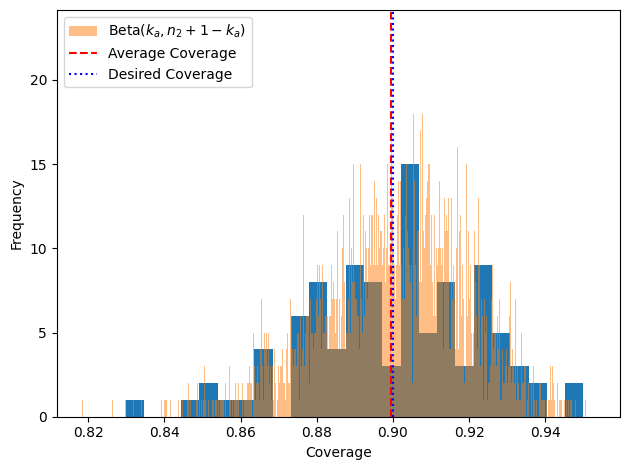

: 

In [ ]:
from uqregressors.conformal.conformal_split import ConformalQuantileRegressor
from uqregressors.metrics.metrics import coverage

def run_prediction_trials(model, alpha, num_trials, dataset_size, train_size, calibrate_size=0):
    """ 
    Runs a number of trials of conformal prediction. The model is trained once, and the 
    calibration and test set are combined and re-split for every iteration. The coverage is calculated, 
    and the distribution of coverage is output. 

    Parameters: 
    -----------
    num_trials: int 
        The number of trials to carry out 
    dataset_size: int 
        The number of data points to generate 
    train_size: float 
        The size of the training dataset relative to the entire dataset size (bounded between 0 and 1)
    calibrate_size: float 
        The size of the calibration dataset relative to the entire dataset size (bounded between 0 and 1)
    poly_order: int 
        The order of the polynomials used to fit the quantile regression functions
    alpha: float
        One minus the desired confidence interval bounded between 0 and 1 (i.e., 0.05)
    """
    coverage_dist = np.empty(num_trials)
    X, y = generate_unvaried_data(dataset_size)
    X_train, X_test, y_train, y_test = process_data(X, y, train_size)
    for i in range(num_trials): 
        X_train, X_test, y_train, y_test = process_data(X, y, train_size)
        model.fit(X_train, y_train)
        mean, lower, upper = model.predict(X_test)
        coverage_dist[i] = coverage(lower, upper, y_test)
        print(i)
        print(f"coverage: {coverage_dist[i]}")
    return coverage_dist

def plot_histogram(distribution, alpha, bin_width=0.005, n2 = None):
    """
    Plots a histogram of the coverage distribution 

    Parameters: 
    ----------
    distribution: array
        The distribution to plot a histogram for
    bin_width: float 
        The width of the histogram bins bounded between 0 and 1 
        Defaults to 0.005 (half a percent)
    
    """
    fig, ax = plt.subplots(tight_layout=True)
    plt.hist(distribution, bins=int(1/bin_width))
    #ax.set_xlim(0, 1)
    ax.set_xlabel("Coverage")
    ax.set_ylabel("Frequency")
    average = np.mean(distribution)
    if n2 is not None: 
        ka = np.ceil((1-alpha) * (n2+1))
        kb = n2 + 1 - ka
        gen = np.random.default_rng()
        distr = gen.beta(ka, kb, 10000)
        plt.hist(distr, bins = int(100/(bin_width)), alpha=0.5, label = 'Beta($k_a, n_2+1-k_a$)')

    plt.axvline(x=average, color='red', linestyle='--', label = 'Average Coverage')
    plt.axvline(x=1-alpha, color = 'blue', linestyle = ':', label = 'Desired Coverage')
    plt.legend()
    plt.show()

num_trials=100
dataset_size = 1000
bin_width = 0.04
train_size = 0.5 
calibrate_size = 0.5
n2 = int(calibrate_size * dataset_size * train_size)
alpha = 0.1

model = ConformalQuantileRegressor(
    hidden_sizes = [128, 128], 
    cal_size=calibrate_size,
    alpha=alpha,
    dropout=None, 
    epochs=100, 
    batch_size=256, 
    learning_rate=5e-4, 
    optimizer_kwargs = {"weight_decay": 1e-6}, 
    device="cuda", 
    scale_data=True, 
    use_wandb=False
)

coverage_distribution = run_prediction_trials(model, alpha, num_trials, dataset_size, train_size, calibrate_size)
plot_histogram(coverage_distribution, alpha, bin_width, n2=n2)